#CIS 545 Project

By: Zihao Deng, Anjaly Nagarajan, Dung Than

December 15th, 2022

#Motivation and Project Overview

![image](https://drive.google.com/uc?export=view&id=1-WOa0GHEO2SDhtoPJyHmxAjoFTUx-Gs0)

HIV has long been a devastating and deadly disease that has taken away lives of millions of people all over the world. According to [WHO](https://www.who.int/news-room/fact-sheets/detail/hiv-aids#:~:text=HIV%20continues%20to%20be%20a,no%20cure%20for%20HIV%20infection.), by the end of 2021, around 38.4 million people in the world is living with HIV, two thirds of whom are in the WHO African Region. Even though there are no cure available for HIV at the moment, individuals and communities can take prevention against the spread HIV in a variety of way. For this project, our group set out to determine the correlation of certain social indicators and the prevalence of HIV. Through our analysis, we hope to shed light on the effectiveness of certain measures in the fight against HIV across the world.

For this project, we analyze a dataset of over 89,000 entries of almost 200 countries and regions from the 1960s to 2015 regarding their performance on various socioeconomic, education, health, and poverty index. We will be focusing on exploring the relationship between HIV prevalence and the aforementioned indicators in these countries using different regression and classification models such as linear regression, logistic regression, decision trees and neural networks. 

After performing EDA, we decided to focus on using a country's adolescent fertility rate, health expenditure, sanitation rate, urban population ratio, and unemployment rate to predict each country's HIV outcome. Based on our models, we would like to see whether we can predict future HIV prevalence in a given region based on the information regarding the indicators above.

Through our analysis, we want to investigate the question of which factors are most likely to correlate to HIV infection rate and asnwer the question of whether certain investment is helpful in reducing HIV prevalence.

This project will be particularly helpful for governments to recognize the correlation between HIV infection rates in their country and certain socioeconomic determinants so that they can make conscious decisions regarding allocating budget to the most effective measures to stop the spread of HIV in their community. In addition, this analysis can also help international organizations makes timely intervention to help countries at high risk of HIV spreading. Our result will help contribute to the 95-95-95 target set by [UNAIDS](https://www.google.com/search?q=95+95+95+hiv&oq=95+95+95+&aqs=chrome.1.69i57j0i512l4j69i60j69i61j69i60.2780j0j7&sourceid=chrome&ie=UTF-8) that aims for HIV testing, treatment, and viral suppression rates to be 95%-95%-95% by 2025 by giving healthcare providers a better idea of the current progress, required future efforts, and predictive results for the upcoming years.


# **1.** Preparation

## **1.1** Imports

In [ ]:
# Import neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
import sklearn
from sklearn.model_selection import train_test_split

import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

## **1.2** Download Dataset

Run this section once in order to download the dataset from Kaggle and convert it into a dataframe. If you run it again, it will ask you to replace data.csv, so you will have to manually type in y into fifth cell. 

In [ ]:
! pip install -q kaggle
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create the kaggle directory and read the uploaded kaggle.json file
# (NOTE: Do NOT run this cell more than once unless restarting kernel)
!mkdir ~/.kaggle

# Read the uploaded kaggle.json file
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
# Download datasets
! kaggle datasets download -d theworldbank/health-nutrition-and-population-statistics

 64% 9.00M/14.0M [00:00<00:00, 93.8MB/s]
100% 14.0M/14.0M [00:00<00:00, 127MB/s] 


In [ ]:
# Unzip folder in Colab content folder
!unzip /content/health-nutrition-and-population-statistics.zip

Archive:  /content/health-nutrition-and-population-statistics.zip
  inflating: data.csv                


In [ ]:
# Read the csv file and save it to a dataframe
df_health_nutrition = pd.read_csv("data.csv")
df_health_nutrition

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
0,Arab World,ARB,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,133.555013,134.159119,134.857912,134.504576,134.105211,133.569626,...,49.999851,49.887046,49.781207,49.672975,49.536047,49.383745,48.796558,48.196418,NaN,NaN
3,Arab World,ARB,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89005,Zimbabwe,ZWE,Use of insecticide-treated bed nets (% of unde...,SH.MLR.NETS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,17.300000,NaN,9.700000,NaN,NaN,26.800000,NaN,NaN
89006,Zimbabwe,ZWE,Use of Intermittent Preventive Treatment of ma...,SH.MLR.SPF2.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13.900000,NaN,7.300000,NaN,NaN,12.900000,NaN,NaN
89007,Zimbabwe,ZWE,Vitamin A supplementation coverage rate (% of ...,SN.ITK.VITA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,83.000000,0.000000,77.000000,49.000000,47.000000,61.000000,34.000000,32.000000,NaN,NaN
89008,Zimbabwe,ZWE,Wanted fertility rate (births per woman),SP.DYN.WFRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.500000,NaN,NaN,NaN,NaN,NaN


# **2.** EDA

## **2.1** Look at Data and convert tolist()

Looking at the first five rows of the data, we can see that for each country, there is a set of indicatrs realted to health that have data from 1960 to 2015. However, upon first glance, there appears to be a significant number of null values even among the first five rows, which we will explore and cut down upon below. Additionally, based on the current format of the dataframe, it is difficult to do in-depth analysis comparing indicators across countries for such a wide range of years, so this indicated that we should reformat the dataframe to be easier to work with.

In [ ]:
df_health_nutrition.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
0,Arab World,ARB,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,133.555013,134.159119,134.857912,134.504576,134.105211,133.569626,...,49.999851,49.887046,49.781207,49.672975,49.536047,49.383745,48.796558,48.196418,NaN,NaN
3,Arab World,ARB,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In order to see the indicators for every country, we converted the column Indicator Name using tolist() in order to guide our choice for indicators that we wanted to focus on.

In [ ]:
set(df_health_nutrition['Indicator Name'].tolist())

{'% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
 '% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
 'AIDS estimated deaths (UNAIDS estimates)',
 'ARI treatment (% of children under 5 taken to a health provider)',
 'Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Adults (ages 15+) and children (0-14 years) living with HIV',
 'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
 'Adults (ages 15+) living with HIV',
 'Adults (ages 15+) newly infected with HIV',
 'Age at first marriage, female',
 'Age at first marriage, male',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old',
 'Age dependency ratio, young',
 'Age population, age 0, female, interpolated',
 'Age population, age 0, male, interpolated',
 'Age population, age 01, female, interpolated',
 'Age population, age 01, male, i

In order to make sure that none of the columns had NaN values, we ran .info() on the data set.

In [ ]:
df_health_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89010 entries, 0 to 89009
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    89010 non-null  object 
 1   Country Code    89010 non-null  object 
 2   Indicator Name  89010 non-null  object 
 3   Indicator Code  89010 non-null  object 
 4   1960            35482 non-null  float64
 5   1961            35325 non-null  float64
 6   1962            35889 non-null  float64
 7   1963            35452 non-null  float64
 8   1964            35483 non-null  float64
 9   1965            35603 non-null  float64
 10  1966            35538 non-null  float64
 11  1967            36022 non-null  float64
 12  1968            35577 non-null  float64
 13  1969            35630 non-null  float64
 14  1970            36910 non-null  float64
 15  1971            37578 non-null  float64
 16  1972            38015 non-null  float64
 17  1973            37542 non-null 

## **2.2** Select Indicators

Below, we select our indicators of interest using our objective to guide us. Essentially, we want to focus on economic and environmental indicators of HIV to determine what areas of improvement governments can focus on in order to improve HIV prevalence rates. For this process, we iteratively selected different indicators to see which ones had enough data to work with (not too many null values). 

In [ ]:
df_health_nutrition.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', 'Unnamed: 60'],
      dtype='object')

**Note regarding the indicators:**

The Health and Nutrition Dataset Contains hundreds of indicators that could potentially be used for our analysis and modeling. However, many of the indicators are repetitive. For instance, different indicators might be giving the same information about GDP, but with either percentage values or real numerical values. Indicators may also give information about the population of all ages as well as smaller age ranges. So the selection of indicators can be considered as a first step to remove multicollinearities through manual inspection.

After selecting the relevant features, we create and *indicator_rename_dict* to map each indicator to a new name which is more concise and will be used later in the DataFrame.

In [ ]:
# Select indicators of interest
health_nutrition_indicators = [
                               #HIV (6/6)
                               '% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
                               '% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
                               'Adults (ages 15+) and children (0-14 years) living with HIV',
                               'Antiretroviral therapy coverage (% of people living with HIV)',
                               'Prevalence of HIV, total (% of population ages 15-49)',
                               'Incidence of HIV (% of uninfected population ages 15-49)',
                              #economic and poverty (7/7)
                               'Health expenditure per capita, PPP', 
                               'Health expenditure, public (% of total health expenditure)',
                               'Health expenditure, total (% of GDP)', 
                               'Out-of-pocket health expenditure (% of total expenditure on health)',
                               'Unemployment, total (% of total labor force)',
                               'Urban population (% of total)',
                               'Urban poverty headcount ratio at national poverty lines (% of urban population)',
                              # #Health In General (sanitary, water, undernourishment)
                              #  'Prevalence of undernourishment (% of population)',
                               'Improved sanitation facilities (% of population with access)',
                               'Improved water source (% of population with access)',
                               'Adolescent fertility rate (births per 1,000 women ages 15-19)',
                              #  'Smoking prevalence, females (% of adults)',
                              #  'Smoking prevalence, males (% of adults)',
                              #  'Community health workers (per 1,000 people)', 
                               #education (primary net, secndary net, tertiary gross)
                               'School enrollment, primary (% net)',
                               'School enrollment, secondary (% net)',
                               'School enrollment, tertiary (% gross)',
                              #   'Literacy rate, adult female (% of females ages 15 and above)',
                              # 'Literacy rate, adult male (% of males ages 15 and above)',
                              # 'Literacy rate, adult total (% of people ages 15 and above)',
                              # 'Literacy rate, youth male (% of males ages 15-24)',
                              # 'Literacy rate, youth total (% of people ages 15-24)',
                               ]

health_nutrition_education_indicators = []                             
                            
indicator_rename_dict = {'% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)' : '% females 15-49 comprehensive HIV knowledge',
                         '% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)' : '% males 15-49 comprehensive HIV knowledge',
                         'Adolescent fertility rate (births per 1,000 women ages 15-19)' : 'adolescent fertility rate',
                         'Adults (ages 15+) and children (0-14 years) living with HIV' : 'total population living with HIV', 
                         'Adults (ages 15+) and children (ages 0-14) newly infected with HIV' : 'total population newly infected with HIV',
                         'Adults (ages 15+) living with HIV' : 'adults living with HIV', 
                         'Adults (ages 15+) newly infected with HIV' : 'adults newly infected with HIV',
                         'Antiretroviral therapy coverage (% of people living with HIV)' : 'HIV population with antiretroviral therapy coverage',
                         'Antiretroviral therapy coverage for PMTCT (% of pregnant women living with HIV)' : 'pregnant women with HIV with antiretroviral therapy coverage for PMTCT',
                         'Children (0-14) living with HIV' : 'children living with HIV', 
                         'Children (ages 0-14) newly infected with HIV' : 'children newly infected with HIV', 
                         'Comprehensive correct knowledge of HIV/AIDS, ages 15-24, female (2 prevent ways and reject 3 misconceptions)' : '% females 15-24 comprehensive HIV knowledge',
                         'Comprehensive correct knowledge of HIV/AIDS, ages 15-24, male (2 prevent ways and reject 3 misconceptions)' : '% males 15-24 comprehensive HIV knowledge', 
                         'Condom use with non regular partner, % adults(15-49), female' : '% 15-49 female adult condom', 
                         'Condom use with non regular partner, % adults(15-49), male' : '% 15-49 male adult condom',
                         'Condom use, population ages 15-24, female (% of females ages 15-24)' : '% 15-24 female adult condom', 
                         'Condom use, population ages 15-24, male (% of males ages 15-24)' : '% 15-24 male adult condom',
                         'Contraceptive prevalence, any methods (% of women ages 15-49)' : '% 15-49 female any contraceptive', 
                         'Contraceptive prevalence, modern methods (% of women ages 15-49)' : '% 15-49 female modern contraceptive', 
                         'Health expenditure, private (% of total health expenditure)' : 'private % health expenditure',
                         'Incidence of HIV (% of uninfected population ages 15-49)' : 'HIV uninfected incidence percentage 15-49',
                         'Prevalence of HIV, female (% ages 15-24)' : '% 15-24 female HIV prevalence', 
                         'Prevalence of HIV, male (% ages 15-24)' : '% 15-24 male HIV prevalence', 
                         'Prevalence of HIV, total (% of population ages 15-49)' : '% 15-49 total HIV prevalence',
                         'Unemployment, total (% of total labor force)' : 'total unemployment ratio',
                         'Urban population (% of total)' : 'urban population ratio',
                         'Urban poverty headcount ratio at national poverty lines (% of urban population)' : 'urban poverty ratio',
                         'Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant)' : 'teenage mothers ratio',
                         'Improved sanitation facilities (% of population with access)' : 'improved sanitation facilities rate',
                         'Improved water source (% of population with access)' : 'improved water source rate'}

new_cols = ['country_name', 'year'] + health_nutrition_indicators
new_cols

['country_name',
 'year',
 '% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
 '% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
 'Adults (ages 15+) and children (0-14 years) living with HIV',
 'Antiretroviral therapy coverage (% of people living with HIV)',
 'Prevalence of HIV, total (% of population ages 15-49)',
 'Incidence of HIV (% of uninfected population ages 15-49)',
 'Health expenditure per capita, PPP',
 'Health expenditure, public (% of total health expenditure)',
 'Health expenditure, total (% of GDP)',
 'Out-of-pocket health expenditure (% of total expenditure on health)',
 'Unemployment, total (% of total labor force)',
 'Urban population (% of total)',
 'Urban poverty headcount ratio at national poverty lines (% of urban population)',
 'Improved sanitation facilities (% of population with access)',
 'Improved water source (% of popula

## **2.3** Change Dataframe Format & Rename Columns

The most important transformation we need to apply to the dataset before it is ready to use is to restructure the way it presents the indicator/feature values.We changed the format of our dataframe here to make the indicators of choice our columns and convert the country name and corresponding year into singular columns. This will make the data easier to work with because we can isolate certain columns when we want to study specific indicators and their relation to the HIV indicators. 

In particular, the original DataFrame has every year between 1960 and 2015 as a single column, and each row contains the values of one indicator and one coutry on each year. We use the **melt** and **pivot_table** functions provided by the Pandas library to switch year to rows and indicators to columns. The new DataFrame should now have each row containing all indicator values for one country in one year.

We also rename the columns/indicators after changing the format using the *indicator_rename_dict* we defined in section **2.2**

In [ ]:
df_tmp = df_health_nutrition[df_health_nutrition['Indicator Name'].isin(health_nutrition_indicators)].sort_values(['Country Name', 'Indicator Name'])
df_tmp = df_tmp.drop(columns=['Country Code', 'Indicator Code'])

# Change the DataFrame format and rename columns
df_tmp = df_tmp.melt(id_vars=["Country Name", "Indicator Name"], var_name="year", value_name="value")
df_tmp = df_tmp.pivot_table('value', ['Country Name', 'year'], 'Indicator Name').reset_index().rename(columns=indicator_rename_dict)

df_health_nutrition_tmp = df_tmp.rename_axis(None, axis=1)
df_tmp

Indicator Name,Country Name,year,% females 15-49 comprehensive HIV knowledge,% males 15-49 comprehensive HIV knowledge,adolescent fertility rate,total population living with HIV,HIV population with antiretroviral therapy coverage,"Health expenditure per capita, PPP","Health expenditure, public (% of total health expenditure)","Health expenditure, total (% of GDP)",...,improved water source rate,HIV uninfected incidence percentage 15-49,Out-of-pocket health expenditure (% of total expenditure on health),% 15-49 total HIV prevalence,"School enrollment, primary (% net)","School enrollment, secondary (% net)","School enrollment, tertiary (% gross)",total unemployment ratio,urban population ratio,urban poverty ratio
0,Afghanistan,1960,NaN,NaN,145.3210,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.221,NaN
1,Afghanistan,1961,NaN,NaN,145.3210,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.508,NaN
2,Afghanistan,1962,NaN,NaN,145.3210,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.805,NaN
3,Afghanistan,1963,NaN,NaN,145.3210,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.110,NaN
4,Afghanistan,1964,NaN,NaN,145.3210,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14339,Zimbabwe,2011,55.9,53.0,114.1658,1300000.0,39.0,96.088338,33.633950,6.306574,...,77.7,1.15,39.069132,15.3,NaN,NaN,5.82376,5.4,33.015,46.5
14340,Zimbabwe,2012,NaN,NaN,113.3310,1300000.0,44.0,112.217797,41.452946,6.686183,...,77.5,1.09,33.999542,15.2,88.716873,43.345291,5.86867,5.3,32.834,NaN
14341,Zimbabwe,2013,NaN,NaN,111.8664,1300000.0,50.0,119.733339,41.380171,6.881193,...,77.3,1.03,34.231009,15.0,85.862389,44.236969,5.87175,5.3,32.654,NaN
14342,Zimbabwe,2014,62.5,59.6,110.4018,1400000.0,57.0,114.608507,38.302761,6.439471,...,77.1,0.95,35.940635,14.9,NaN,NaN,NaN,5.4,32.501,NaN


## **2.4** Clean Dataframes

Since the availability of data varies greatly from countries to countries, we decided to fill in the missing values in the table. In order to determine the values to be filled in for each feature, we imported a data set (linked below) to determine the continent of each country in the dataset, after which we group the data by continent to find the continental mean of each category. After finding the average of each of these categories, we fill the missing values in the dataset with the corresponding continental average. By filling missing data with continental mean values rather than 0s, we are able to provide a more accurate interpolation of the data since it does not make sense that countries would have arbitrary values for health rates.

In doing so, we first extract the list of continent from the country-continent dataset we found online (linked below)

In [ ]:
continents_df = pd.read_csv('https://raw.githubusercontent.com/datasets/country-codes/master/data/country-codes.csv',na_filter = False)
continents_df = continents_df[['official_name_en', 'Continent']]
unique_continent = list(continents_df['Continent'].unique())
unique_continent

['AS', 'EU', 'AF', 'OC', 'NA', 'AN', 'SA', '']

Then we joined the dataset with our reformatted dataframe on "Country Name" to assign a Continent value to each of the rows. We noticed that since there are some mismatching values of Countries not having a valid continent associated with them in the joined dataset, we extract a list of these values to manually assign a continent value.

In [ ]:
df_joined = df_health_nutrition_tmp.join(continents_df.set_index('official_name_en'), on = ['Country Name'], how = 'left')
null_continent = df_joined[df_joined['Continent'].isna()]
country_list = list(null_continent['Country Name'].unique())
country_list

['Arab World',
 'Bahamas, The',
 'Bolivia',
 'Caribbean small states',
 'Central Europe and the Baltics',
 'Channel Islands',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Curacao',
 'Czech Republic',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD countries)',
 'East Asia & Pacific (excluding high income)',
 'Egypt, Arab Rep.',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'Fragile and conflict affected situations',
 'Gambia, The',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'Hong Kong SAR, China',
 'Iran, Islamic Rep.',
 'Korea, Dem. People’s Rep.',
 'Korea, Rep.',
 'Kosovo',
 'Kyrgyz Republic',
 'Lao PDR',
 'Late-demographic dividend',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Least developed countries: UN

Now, we will assign a Continent value to some of the countries in the list above. We omit entries that is ambiguous or cause double counting such as 'Early-demographic dividend', 'Caribbean small states', 'East Asia & Pacific (IDA & IBRD countries)', 'East Asia & Pacific (excluding high income)',...

In [ ]:
df_joined.loc[df_joined['Country Name'] == 'Bahamas, The', 'Continent'] = 'NA'

df_joined.loc[df_joined['Country Name'] == 'Bolivia','Continent'] = 'SA'

df_joined.loc[df_joined['Country Name'] == 'Channel Islands','Continent'] = 'EU'

df_joined.loc[df_joined['Country Name'] == 'Congo, Dem. Rep.','Continent'] = 'AF'

df_joined.loc[df_joined['Country Name'] == "Cote d'Ivoire",'Continent'] = 'AF'

df_joined.loc[df_joined['Country Name'] == 'Curacao','Continent'] = 'SA'

df_joined.loc[df_joined['Country Name'] == 'Czech Republic','Continent'] = 'EU'

df_joined.loc[df_joined['Country Name'] == 'Egypt, Arab Rep.','Continent'] = 'AF'

df_joined.loc[df_joined['Country Name'] == 'Gambia, The','Continent'] = 'AF'

df_joined.loc[df_joined['Country Name'] == 'Hong Kong SAR, China','Continent'] = 'AS'

df_joined.loc[df_joined['Country Name'] == 'Iran, Islamic Rep.','Continent'] = 'AS'

df_joined.loc[df_joined['Country Name'] == 'Korea, Dem. People’s Rep.','Continent'] = 'AS'

df_joined.loc[df_joined['Country Name'] == 'Korea, Rep.','Continent'] = 'AS'

df_joined.loc[df_joined['Country Name'] == 'Kosovo','Continent'] = 'EU'

df_joined.loc[df_joined['Country Name'] == 'Kyrgyz Republic','Continent'] = 'AS'

df_joined.loc[df_joined['Country Name'] == 'Lao PDR','Continent'] = 'AS'

df_joined.loc[df_joined['Country Name'] == 'Macao SAR, China','Continent'] = 'AS'

df_joined.loc[df_joined['Country Name'] == 'Macedonia, FYR','Continent'] = 'EU'

df_joined.loc[df_joined['Country Name'] == 'Micronesia, Fed. Sts.','Continent'] = 'AN'

df_joined.loc[df_joined['Country Name'] == 'Moldova','Continent'] = 'EU'

df_joined.loc[df_joined['Country Name'] == 'Slovak Republic','Continent'] = 'EU'

df_joined.loc[df_joined['Country Name'] == 'St. Kitts and Nevis','Continent'] = 'NA'

df_joined.loc[df_joined['Country Name'] == 'St. Lucia','Continent'] = 'NA'

df_joined.loc[df_joined['Country Name'] == 'St. Vincent and the Grenadines','Continent'] = 'NA'

df_joined.loc[df_joined['Country Name'] == 'Swaziland','Continent'] = 'AF'

df_joined.loc[df_joined['Country Name'] == 'Tanzania','Continent'] = 'AF'

df_joined.loc[df_joined['Country Name'] == 'United Kingdom','Continent'] = 'EU'

df_joined.loc[df_joined['Country Name'] == 'United States','Continent'] = 'NA'

df_joined.loc[df_joined['Country Name'] == 'Venezuela, RB','Continent'] = 'SA'

df_joined.loc[df_joined['Country Name'] == 'Vietnam','Continent'] = 'AS'

df_joined.loc[df_joined['Country Name'] == 'Virgin Islands (U.S.)','Continent'] = 'NA'

df_joined.loc[df_joined['Country Name'] == 'West Bank and Gaza','Continent'] = 'AS'

df_joined.loc[df_joined['Country Name'] == 'Yemen, Rep.','Continent'] = 'AS'

Since there are a good amount of missing data for our dataset, especially for developing countries and data before the year 2000, we will be filling in missing values of this dataset with the average value of each indicator in its continent. We are doing this so that we can keep at least 10k rows and to meet the lower bound number of rows of this assignment. 

In [ ]:
df_joined = df_joined.set_index(['Continent'])
column_headers = list(df_joined.columns.values)
column_headers.remove('Country Name')
column_headers.remove('year')


for column in column_headers:
  means = df_joined.groupby('Continent')[column].mean()
  df_joined[column] = df_joined[column].fillna(means)


df_joined = df_joined.reset_index()
df_joined = df_joined.rename(columns={'Country Name':"country_name"})
df_health_nutrition_tmp = df_joined
df_health_nutrition_tmp

,Continent,country_name,year,% females 15-49 comprehensive HIV knowledge,% males 15-49 comprehensive HIV knowledge,adolescent fertility rate,total population living with HIV,HIV population with antiretroviral therapy coverage,"Health expenditure per capita, PPP","Health expenditure, public (% of total health expenditure)",...,improved water source rate,HIV uninfected incidence percentage 15-49,Out-of-pocket health expenditure (% of total expenditure on health),% 15-49 total HIV prevalence,"School enrollment, primary (% net)","School enrollment, secondary (% net)","School enrollment, tertiary (% gross)",total unemployment ratio,urban population ratio,urban poverty ratio
0,AS,Afghanistan,1960,18.986364,25.500000,145.321000,1.283655e+05,9.929688,706.851740,50.372658,...,84.629646,0.032388,43.277415,0.276756,88.013115,63.821105,20.010003,7.210764,8.221,16.383720
1,AS,Afghanistan,1961,18.986364,25.500000,145.321000,1.283655e+05,9.929688,706.851740,50.372658,...,84.629646,0.032388,43.277415,0.276756,88.013115,63.821105,20.010003,7.210764,8.508,16.383720
2,AS,Afghanistan,1962,18.986364,25.500000,145.321000,1.283655e+05,9.929688,706.851740,50.372658,...,84.629646,0.032388,43.277415,0.276756,88.013115,63.821105,20.010003,7.210764,8.805,16.383720
3,AS,Afghanistan,1963,18.986364,25.500000,145.321000,1.283655e+05,9.929688,706.851740,50.372658,...,84.629646,0.032388,43.277415,0.276756,88.013115,63.821105,20.010003,7.210764,9.110,16.383720
4,AS,Afghanistan,1964,18.986364,25.500000,145.321000,1.283655e+05,9.929688,706.851740,50.372658,...,84.629646,0.032388,43.277415,0.276756,88.013115,63.821105,20.010003,7.210764,9.426,16.383720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14339,AF,Zimbabwe,2011,55.900000,53.000000,114.165800,1.300000e+06,39.000000,96.088338,33.633950,...,77.700000,1.150000,39.069132,15.300000,66.891687,26.976704,5.823760,5.400000,33.015,46.500000
14340,AF,Zimbabwe,2012,25.337313,36.426374,113.331000,1.300000e+06,44.000000,112.217797,41.452946,...,77.500000,1.090000,33.999542,15.200000,88.716873,43.345291,5.868670,5.300000,32.834,29.608738
14341,AF,Zimbabwe,2013,25.337313,36.426374,111.866400,1.300000e+06,50.000000,119.733339,41.380171,...,77.300000,1.030000,34.231009,15.000000,85.862389,44.236969,5.871750,5.300000,32.654,29.608738
14342,AF,Zimbabwe,2014,62.500000,59.600000,110.401800,1.400000e+06,57.000000,114.608507,38.302761,...,77.100000,0.950000,35.940635,14.900000,66.891687,26.976704,4.922746,5.400000,32.501,29.608738


After conducting value imputation, cleaning, and reformatting our dataframe, we dropped all the null values that still remained and were left with our final dataframe that we used for our indicator analysis and modeling.

In [ ]:
#cleaning df_health_nutrition_tmp
df_health_nutrition_tmp.columns = df_health_nutrition_tmp.columns.str.replace(' ', '_').str.lower()

#drop duplicates
df_health_nutrition_tmp = df_health_nutrition_tmp.drop_duplicates()

#change dtype of year column
df_health_nutrition_tmp = df_health_nutrition_tmp.astype({'year':'int64'})

df_health_nutrition_tmp
# df_final = df_health_nutrition_tmp.dropna(thresh=df_health_nutrition_tmp.shape[0]*0.2,how='all',axis=1)
df_final = df_health_nutrition_tmp.dropna()
df_final

,continent,country_name,year,%_females_15-49_comprehensive_hiv_knowledge,%_males_15-49_comprehensive_hiv_knowledge,adolescent_fertility_rate,total_population_living_with_hiv,hiv_population_with_antiretroviral_therapy_coverage,"health_expenditure_per_capita,_ppp","health_expenditure,_public_(%_of_total_health_expenditure)",...,improved_water_source_rate,hiv_uninfected_incidence_percentage_15-49,out-of-pocket_health_expenditure_(%_of_total_expenditure_on_health),%_15-49_total_hiv_prevalence,"school_enrollment,_primary_(%_net)","school_enrollment,_secondary_(%_net)","school_enrollment,_tertiary_(%_gross)",total_unemployment_ratio,urban_population_ratio,urban_poverty_ratio
0,AS,Afghanistan,1960,18.986364,25.500000,145.321000,1.283655e+05,9.929688,706.851740,50.372658,...,84.629646,0.032388,43.277415,0.276756,88.013115,63.821105,20.010003,7.210764,8.221,16.383720
1,AS,Afghanistan,1961,18.986364,25.500000,145.321000,1.283655e+05,9.929688,706.851740,50.372658,...,84.629646,0.032388,43.277415,0.276756,88.013115,63.821105,20.010003,7.210764,8.508,16.383720
2,AS,Afghanistan,1962,18.986364,25.500000,145.321000,1.283655e+05,9.929688,706.851740,50.372658,...,84.629646,0.032388,43.277415,0.276756,88.013115,63.821105,20.010003,7.210764,8.805,16.383720
3,AS,Afghanistan,1963,18.986364,25.500000,145.321000,1.283655e+05,9.929688,706.851740,50.372658,...,84.629646,0.032388,43.277415,0.276756,88.013115,63.821105,20.010003,7.210764,9.110,16.383720
4,AS,Afghanistan,1964,18.986364,25.500000,145.321000,1.283655e+05,9.929688,706.851740,50.372658,...,84.629646,0.032388,43.277415,0.276756,88.013115,63.821105,20.010003,7.210764,9.426,16.383720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14339,AF,Zimbabwe,2011,55.900000,53.000000,114.165800,1.300000e+06,39.000000,96.088338,33.633950,...,77.700000,1.150000,39.069132,15.300000,66.891687,26.976704,5.823760,5.400000,33.015,46.500000
14340,AF,Zimbabwe,2012,25.337313,36.426374,113.331000,1.300000e+06,44.000000,112.217797,41.452946,...,77.500000,1.090000,33.999542,15.200000,88.716873,43.345291,5.868670,5.300000,32.834,29.608738
14341,AF,Zimbabwe,2013,25.337313,36.426374,111.866400,1.300000e+06,50.000000,119.733339,41.380171,...,77.300000,1.030000,34.231009,15.000000,85.862389,44.236969,5.871750,5.300000,32.654,29.608738
14342,AF,Zimbabwe,2014,62.500000,59.600000,110.401800,1.400000e+06,57.000000,114.608507,38.302761,...,77.100000,0.950000,35.940635,14.900000,66.891687,26.976704,4.922746,5.400000,32.501,29.608738


In [ ]:
# We use this to ensure we are using the properly formatted column names in our analysis
df_final.columns

Index(['continent', 'country_name', 'year',
       '%_females_15-49_comprehensive_hiv_knowledge',
       '%_males_15-49_comprehensive_hiv_knowledge',
       'adolescent_fertility_rate', 'total_population_living_with_hiv',
       'hiv_population_with_antiretroviral_therapy_coverage',
       'health_expenditure_per_capita,_ppp',
       'health_expenditure,_public_(%_of_total_health_expenditure)',
       'health_expenditure,_total_(%_of_gdp)',
       'improved_sanitation_facilities_rate', 'improved_water_source_rate',
       'hiv_uninfected_incidence_percentage_15-49',
       'out-of-pocket_health_expenditure_(%_of_total_expenditure_on_health)',
       '%_15-49_total_hiv_prevalence', 'school_enrollment,_primary_(%_net)',
       'school_enrollment,_secondary_(%_net)',
       'school_enrollment,_tertiary_(%_gross)', 'total_unemployment_ratio',
       'urban_population_ratio', 'urban_poverty_ratio'],
      dtype='object')

# 3 EDA: HIV and Indicator Analysis

To begin our analysis, we wanted to plot the heatmap again offering correlations between each of our indicators. We want to acknowledge the risk of multicollinearity, which is when multiple features are correlated with each other. For the most part, there is not extremely high correlation between our different categories of features like economics vs. health vs. education, but there is realtively strong correlation within categories. This is why we plan on focusing on one indicator at a time within each category. For instance, snce public health expenditure and out of pocket health expenditure % have a -0.91 strong negative correlation, we tried to avoid any analysis with both variables at once. We will address this in our modeling section by running PCA to reduce multicollinearity and perform dimensionality reduction.

As we can see, by looking at the % 15-49 Total HIV Prevalence Rate in specific, there appears to be a negative correlation with sanitation facilities, water source improvement, health expenditure per capita, public health expenditure, urban population ratio, and primary, secondary, and tertiary education percentages. 


On the other hand, there appears to be positive correlation with adolescent fertility rate, male comprehensive HIV knowledge, unemployment, and urban poverty ratio. There is no correlation between female comprehensive HIV knowledge, HIV antiretroviral therapy, out of pocket health expenditures, and total health expenditure. We will explore the higher correlations which include secondary school enrollment, adolescent fertility rate, improved sanitation facilitites rate, improved water source.


Text(0.5, 1.0, 'Correlation Matrix Heatmap of all Indicators')

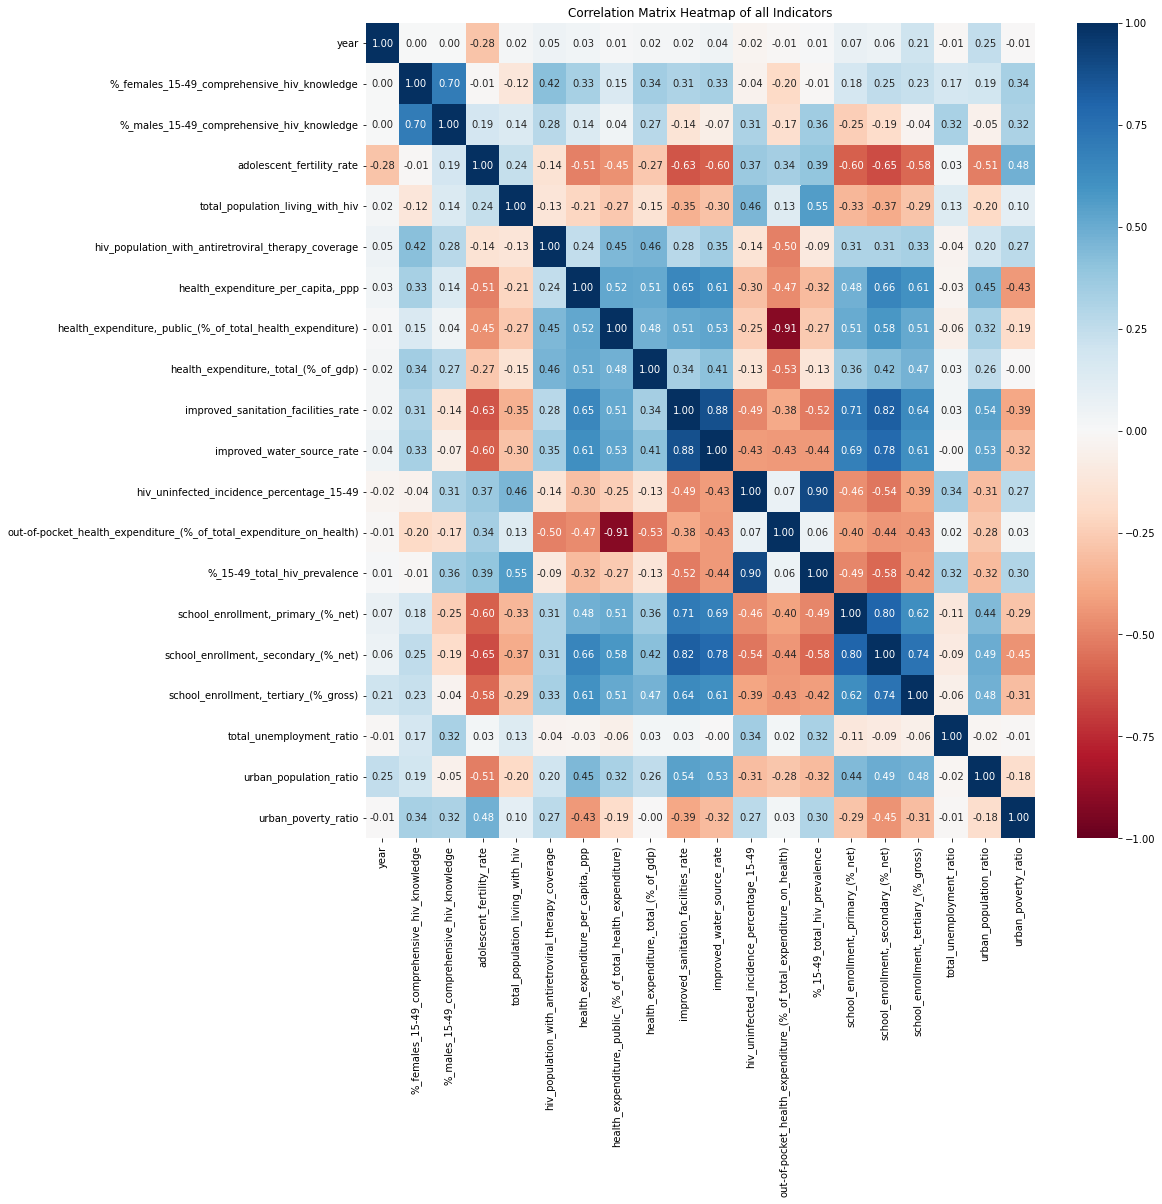

In [ ]:
fig, ax = plt.subplots(figsize=(15,15)) 
correlation_matrix = df_final.corr()
ax = sns.heatmap(correlation_matrix, vmax=1, vmin=-1, cmap='RdBu', annot = True, fmt = '.2f')
ax.set_title('Correlation Matrix Heatmap of all Indicators')

On the map below, we can see that for a majority of the countries, there is insufficient data on HIV prevalence, which is why after our value imputation for filling in null values, especially in North America, Europe, and Australia. Thus, this includes many developed nations such as the US, Canada, Europe, and Australia. The United States and Canada appear to have slightly higher levels of HIV because Mexico and Central American countries/islands were the only ones with data.

However, there is relatively thorough data for South America, south/southeast Asia, central Asia, and Africa. We can clearly see just from this map alone that Africa is a hotspot for HIV especially among the rest of the world. Zooming into Africa, it is specifically the Southern region that has the highest rates, almost double the rest of Africa and almost 5-6x the rest of the world. We will try to determine what is propelling their higher than average HIV rates as well as common indicators among each of the major regions that have lower HIV rates.

In [ ]:
geohiv = df_final[['country_name','%_15-49_total_hiv_prevalence']]
geohiv  = geohiv.groupby('country_name').mean()
geohiv.reset_index(inplace=True)

fig = px.choropleth(data_frame = geohiv, locations="country_name", locationmode = 'country names',
                    color="%_15-49_total_hiv_prevalence", hover_name='%_15-49_total_hiv_prevalence', 
                    color_continuous_scale=px.colors.sequential.Sunset, 
                    title = 'Average HIV Prevalence Rate by Nation (After Imputation)')

fig.show()

## **3.1** Economic Indicators

First, we created a smaller scale heatmap to look into the correlation between HIV indicators and health expenditures. We thought it would be visually easier to look at over the large correlation matrix with all of our indicators.

At first glance, there is a moderate negative correlation between health_expenditure_per_capita,_ppp and total HIV prevalence of around -0.32. This means that as health_expenditure_per_capita,_ppp increases, HIV prevalence decreases, which is shown more on our dot plot below. This could either indicate that governments are not spending their health expenditures on HIV protection/prevention or that they are not spending in an effective way that actually brings down HIV rates.



Text(0.5, 1.0, 'Correlation Matrix Heatmap of Economic and HIV Indicators')

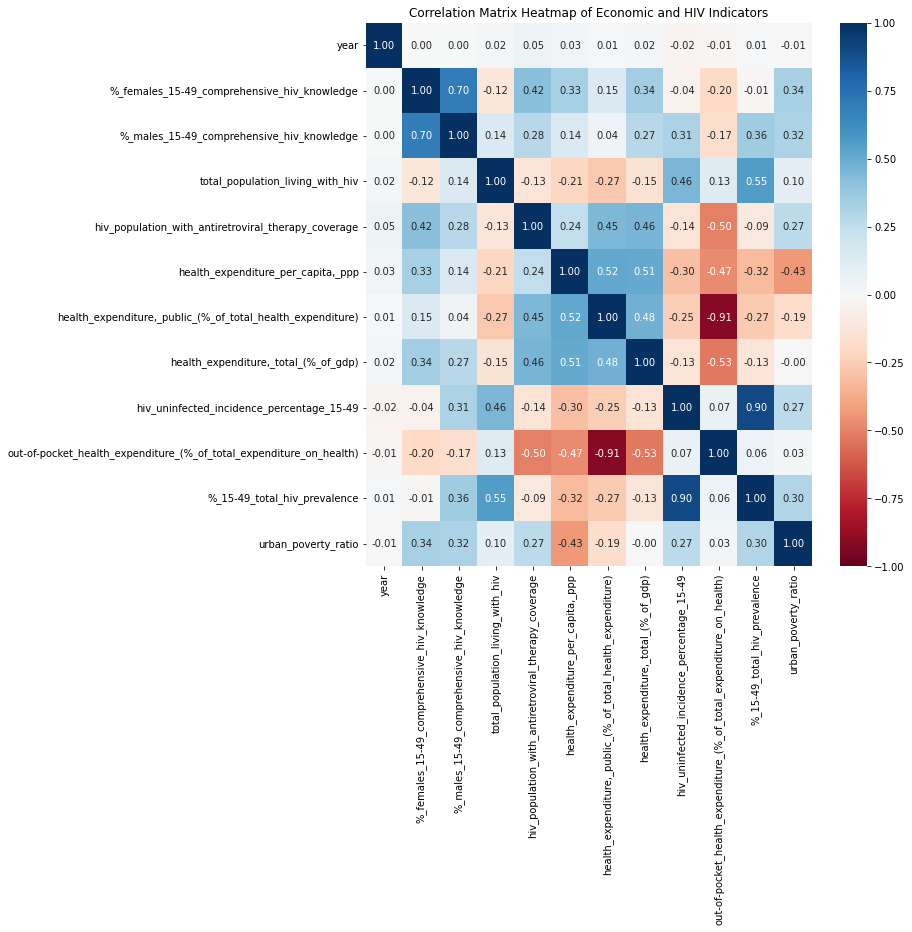

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
df_econ = df_final.drop(columns = ['adolescent_fertility_rate',
                        'improved_sanitation_facilities_rate', 'improved_water_source_rate',
                        'total_unemployment_ratio',
                        'urban_population_ratio',
                        'school_enrollment,_primary_(%_net)',
                        'school_enrollment,_secondary_(%_net)',
                        'school_enrollment,_tertiary_(%_gross)'])

correlation_matrix = df_econ.corr()
ax = sns.heatmap(correlation_matrix, vmax=1, vmin=-1, cmap='RdBu', annot = True, fmt = '.2f')
ax.set_title('Correlation Matrix Heatmap of Economic and HIV Indicators')

As we can see clearly, the United States, Canada, and areas of Europe have the highest health expenditure per capita by a margin. Next, Asia and South America spend about half of what those developed nations spend. Finally, Africa spends less than a sixth of the highest countries. We hypothesize that overall lower public health expendture per capita on the whole reduces the number of people that visit hospitals in Africa, get treatment or even tested in the first palce for HIV, and it can lead to overall reduced immunity levels, which increases suseptibility to HIV. However, we will explore the relationship between HIV prevalence and health expendture per capita more in depth below.

In [ ]:
econhiv_prim = df_final[['country_name','health_expenditure_per_capita,_ppp']]
econhiv_prim  = econhiv_prim.groupby('country_name').mean()
econhiv_prim.reset_index(inplace=True)

fig = px.choropleth(data_frame = econhiv_prim, locations="country_name", locationmode = 'country names',
                    color='health_expenditure_per_capita,_ppp', 
                    hover_name='health_expenditure_per_capita,_ppp', 
                    color_continuous_scale=px.colors.sequential.Sunset, 
                    title = 'Average Health Expenditure Per Capita')

fig.show()

In the dot plot below, we plotted health expenditure per capita vs HIV %prevalence among ages 15-49 with our hue being countries. We can see there is a weak negative relationship between the variables  because there is a higher concentration of countries that have higher toatl HIV prevalence rates and much lower health expenditure per capita in their country as compared to countries with high health expenditure per capita. At first, I was shocked to see almost a vertical line of countries centered around the lowest health expenditure per capita rates and how there was such a range in HIV prevalence rates. However, this led me to draw an overall conclusion that even increasing from no health expenditure per capita to a minimal amount upwards of 1,000 per person can drastically reduce HIV rates and should be seen as an investment. However, there is not a one to one connection that the countries that spend nothing have a high HIV rate because there are some dots (nations) with no health expenditure per capita but low HIV prevalence rates. One possible shortcoming of this graph is that our value imputation method of averaging caused a higher amount of dots centered throughout the $0 health expenditure per capita range. 

Text(0.5, 1.0, 'Dot Plot Health Expenditure Per Capita Each Country')

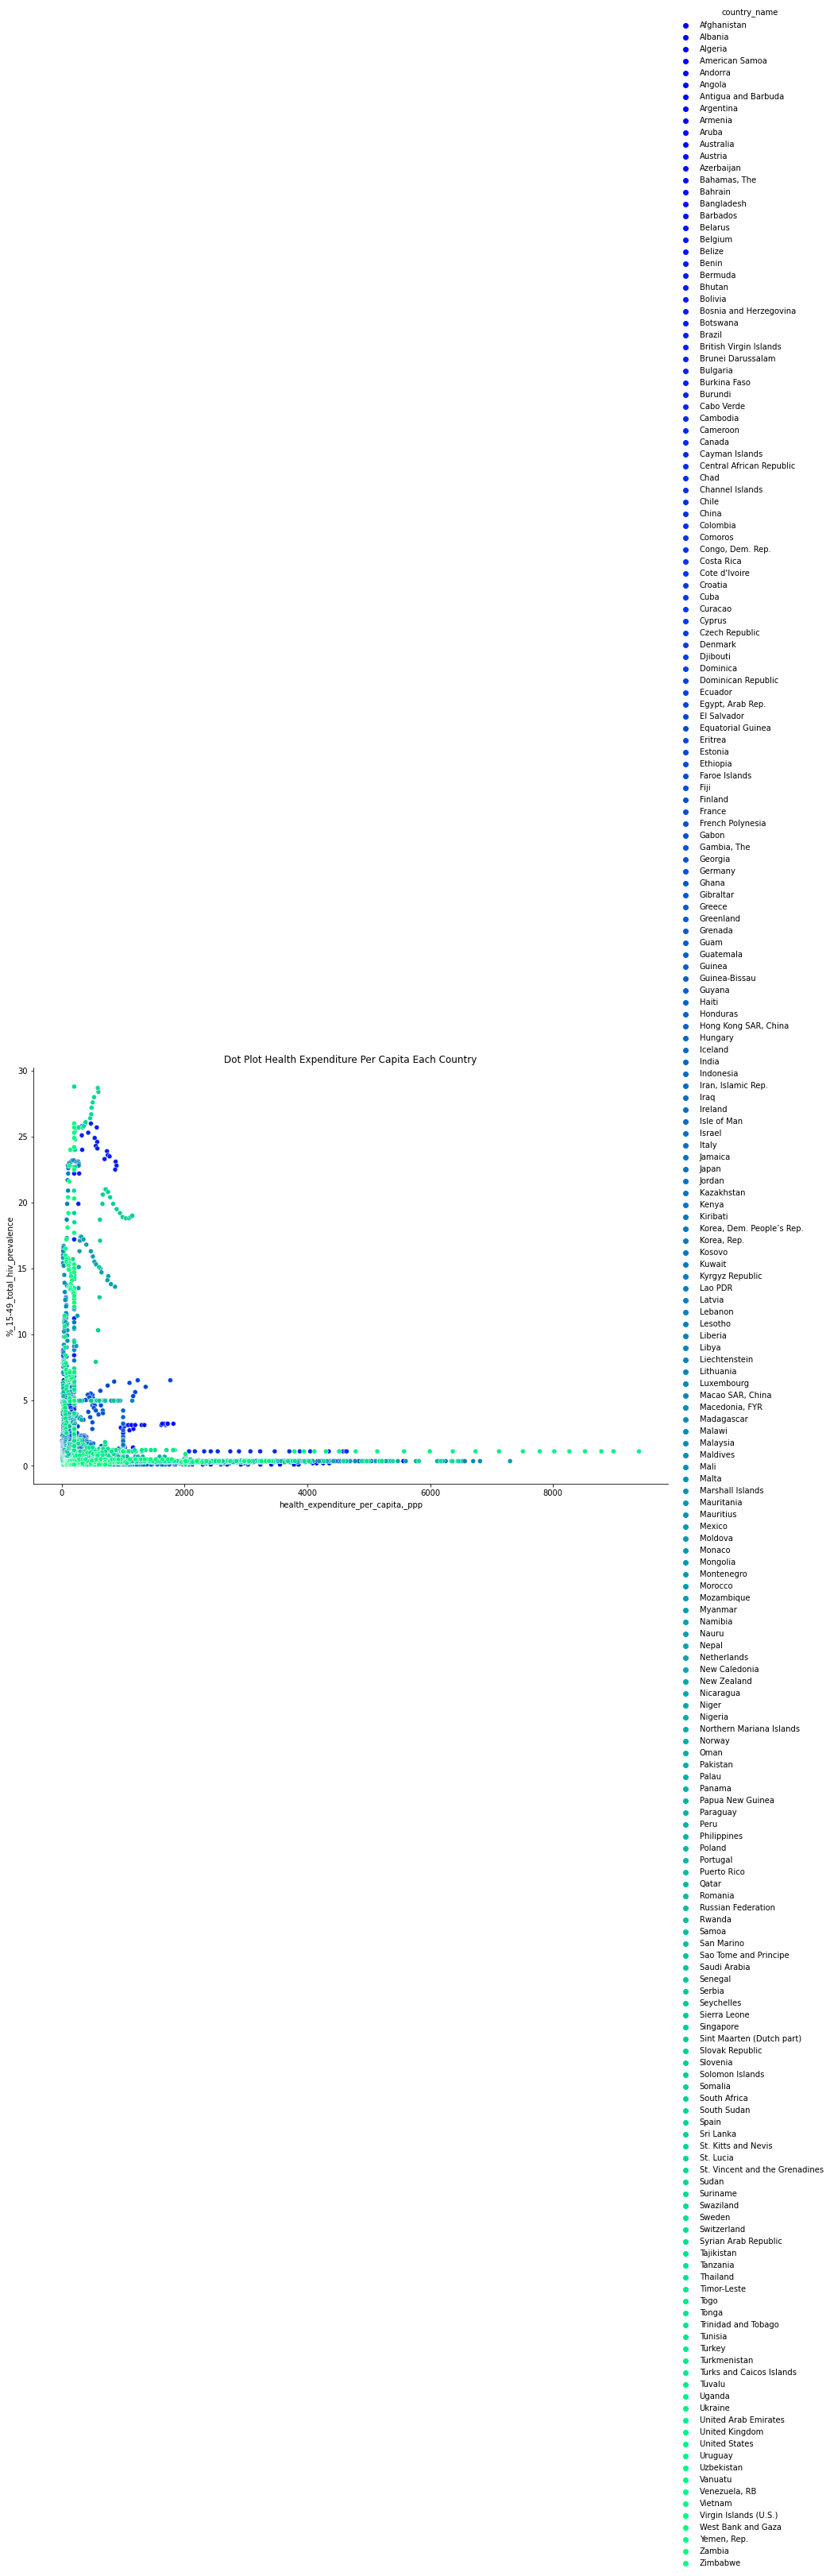

In [ ]:
hiv_econ_countries= sns.relplot(x='health_expenditure_per_capita,_ppp', 
                                y='%_15-49_total_hiv_prevalence', palette = 'winter', 
                                data=df_final, hue = 'country_name', height=8, aspect=1.5);
plt.title("Dot Plot Health Expenditure Per Capita Each Country")


Looking at the highest per capita health expenditure and lowest HIV prevalence %, there is no overlap, but this could be because countries with the lowest HIV prevalence rates have extremely similar ones because they are so low and the European countries dominate with the Highest Per Capita Health Expenditure indicator. 

As for countries with the lowest per capita health expenditure and highest HIV prevalence, there is overlap including Central African Republic and Mozambique. However, there is a high concentration of countries in Africa on both lists and the lack of overlap could be due to our value imputations using averages rather than the specific numbers and countries. This further supports our hypothesis that lower per capita health expenditure could be a reason for higher prevailing health expenditure rates.

In [ ]:
econ = df_final.groupby('country_name')['health_expenditure_per_capita,_ppp'].mean()
econcat_sorted = econ.sort_values()


hiv_econ = df_final.groupby('country_name')['%_15-49_total_hiv_prevalence'].mean()
hiv_econ_sorted = hiv_econ.sort_values()

print("Highest Per Capita Health Expenditure and Lowest HIV Prevalence")
print(econcat_sorted.tail(15));
print()
print(hiv_econ_sorted.head(15));
print()

print()
print()
print("Lowest Per Capita Health Expenditure and Highest HIV Prevalence")
print(econcat_sorted.head(15));
print()
print(hiv_econ_sorted.tail(15));

Highest Per Capita Health Expenditure and Lowest HIV Prevalence
country_name
Ireland          2279.591760
San Marino       2303.341474
Belgium          2368.442026
Iceland          2402.712576
Sweden           2438.276455
France           2453.192706
Denmark          2494.730469
Netherlands      2528.669714
Germany          2539.827398
Austria          2583.895522
Norway           2794.221670
Monaco           2806.653462
Switzerland      2824.542458
United States    2959.046178
Luxembourg       3050.580362
Name: health_expenditure_per_capita,_ppp, dtype: float64

country_name
Afghanistan           0.194691
Yemen, Rep.           0.194691
Iran, Islamic Rep.    0.194691
Lebanon               0.194691
Mongolia              0.194691
Pakistan              0.194691
Sri Lanka             0.194691
Philippines           0.194691
Bangladesh            0.194691
Azerbaijan            0.198262
Kazakhstan            0.200048
Kyrgyz Republic       0.205405
Armenia               0.212548
Georgia       

Looking at a continent aggregated level, there is a heightened value for Europe, a much lower value for Africa, and the other continents are ina much closer range of of values between. However, contrasting this to the % 15-49 Total HIV Prevalence bar chart, Africa has the highest prevalence rate significantly followed by North America. 

We should note that Asia actually hast the lowest HIV prevalence rate despite their Health Expenditure per Capita being les than Half of Europe's. However, after doing outside research, part of the reason is that many countries in Asia like China, India, etc. have extremely high population numbers which means that even a small percentage still signals a lot of people. This means that many could still be infected with HIV, but also that the governments of these highly populated countries may not be able to spend as much on health expenditure per capita. Also, in the 1990s when there was an HIV epidemic, many countries took extreme measures to install preventative programs, thus decreasing their prevalence rate drastically (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4651036/).

From this continent level aggregation, we are reinforcing the points from above that Africa health expenditure per capita is significantly below the rest of the world and their HIV prevalence rate is significantly higher. 

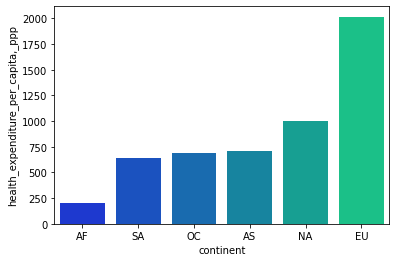

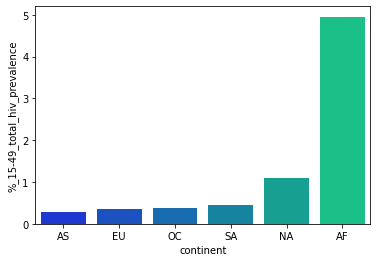

In [ ]:
continent_econ = df_final.groupby('continent')['health_expenditure_per_capita,_ppp'].mean().reset_index()
continent_econ_sorted = continent_econ.sort_values(by = 'health_expenditure_per_capita,_ppp')
cont_econ_plot = sns.barplot(x = 'continent', y = 'health_expenditure_per_capita,_ppp', data = continent_econ_sorted, 
                                 palette = 'winter')
plt.show()

continent_hiv = df_final.groupby('continent')['%_15-49_total_hiv_prevalence'].mean().reset_index()
continent_hiv_sorted = continent_hiv.sort_values(by = '%_15-49_total_hiv_prevalence')
cont_hiv_plot = sns.barplot(x = 'continent', y = '%_15-49_total_hiv_prevalence', data = continent_hiv_sorted, 
                                 palette = 'winter')
plt.show()

## **3.2** Health Indicators

Next, we decided to focus on health indicators to see how they correlate with HIV prevalence. This includes metrics like adolescent fertility rate, sanitation facilites rate, improved sanitaion facilities rate, and improved water source rate. We wanted to focus on the indicators with the highest correlations with HIV rates. This includes adolescent fertility rate which has moderately positive correlation with % 15-49 HIV prevalence and improved sanitation facilitites rate and improved water soruce rate both have moderately negative correlation with % 15-49 HIV prevalence.

Text(0.5, 1.0, 'Correlation Matrix Heatmap of Health and HIV Indicators')

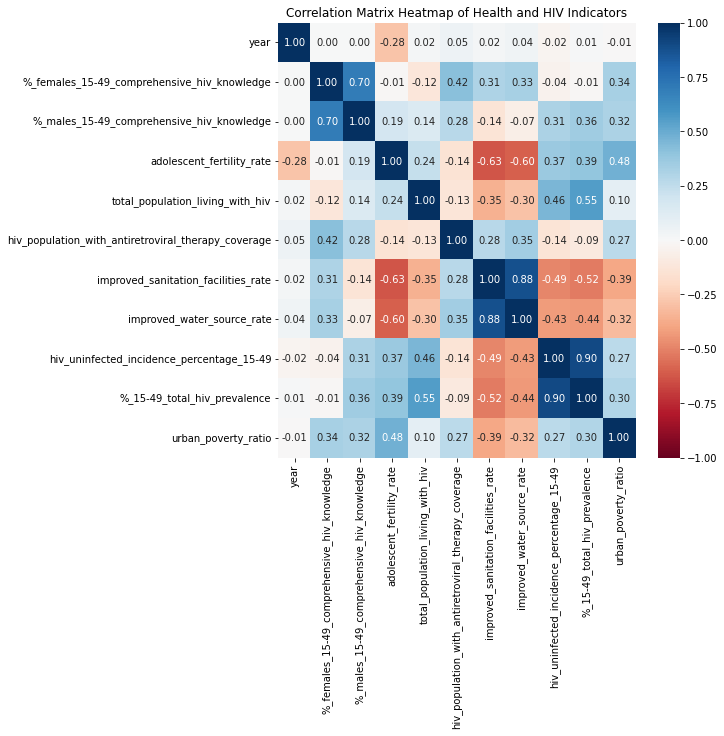

In [ ]:
fig, ax = plt.subplots(figsize=(8,8)) 
df_health = df_final.drop(columns = ['health_expenditure_per_capita,_ppp',
                                  'health_expenditure,_public_(%_of_total_health_expenditure)',
                                  'health_expenditure,_total_(%_of_gdp)',
                                  'out-of-pocket_health_expenditure_(%_of_total_expenditure_on_health)',
                                  'total_unemployment_ratio',
                                  'urban_population_ratio',
                                  'school_enrollment,_primary_(%_net)',
                                  'school_enrollment,_secondary_(%_net)',
                                  'school_enrollment,_tertiary_(%_gross)'])

correlation_matrix = df_health.corr()
ax = sns.heatmap(correlation_matrix, vmax=1, vmin=-1, cmap='RdBu', annot = True, fmt = '.2f')
ax.set_title('Correlation Matrix Heatmap of Health and HIV Indicators')

### 3.2.1 Adolescent Fertility Rate

In the map below, we can see that specific regions have much higher adolescent fertiliy rates such as Africa, South America, the Middle East, and South/Southeastern Asia. However, Africa has significantly higher rates than these other regions, so we will specifically look at this region to see there is a pattern, which we hypothesize that there is because HIV normally stems from unsafe sex practices, which could also lead to higher adolescent fertility rates because both involve lack of contraceptive protection.

In [ ]:
fertilityhiv_prim = df_health[['country_name','adolescent_fertility_rate']]
fertilityhiv_prim  = fertilityhiv_prim.groupby('country_name').mean()
fertilityhiv_prim.reset_index(inplace=True)

fig = px.choropleth(data_frame = fertilityhiv_prim, locations="country_name", locationmode = 'country names',
                    color='adolescent_fertility_rate', 
                    hover_name='adolescent_fertility_rate', 
                    color_continuous_scale=px.colors.sequential.Sunset, 
                    title = 'Average Adolescent Fertility Rate by Nation')

fig.show()

Visually, this graph does not provide a lot of information about whether there is a clear correlation between adolescent fertility rates and hiv prevalence among age groups 15-49. This dot plot in fact is difficult to analyze because of the concentration of dots for 0-5% of 15-49 total HIV prevalence. Although it looks like a slight negative correlation, the correlation matrix above stated there was a moderately positve correlation, indicating that there is likely concentrations of dots at low adolescent fertility rates and low HIV prevalence rates which are difficult to discern - a limitation of this graph.

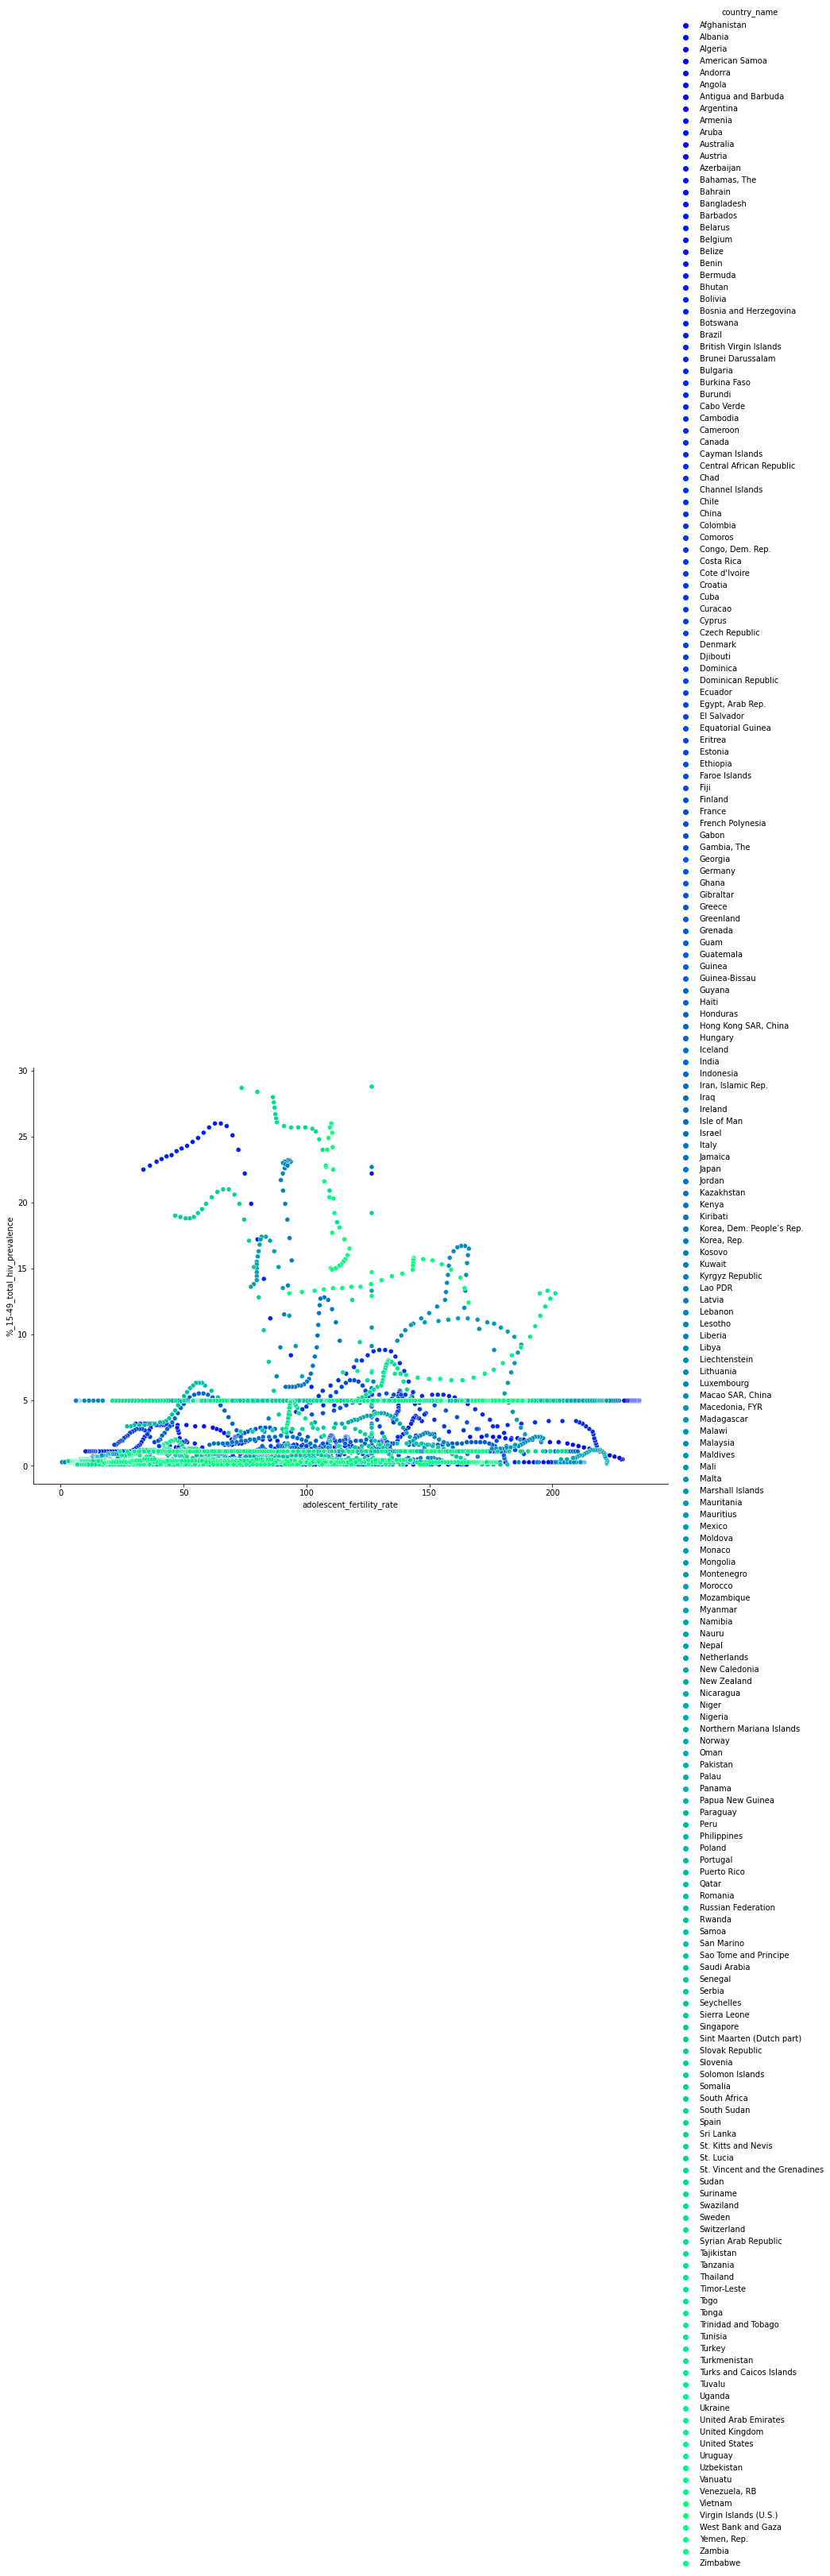

In [ ]:
hiv_fert_countries= sns.relplot(x='adolescent_fertility_rate', 
                                y='%_15-49_total_hiv_prevalence', palette = 'winter', 
                                data=df_final, hue = 'country_name', height=8, aspect=1.5);

Looking at the highest adolescent fertility rates and highest HIV prevalence rates, we cannot really compare the countries because the adolescent fertility rate data includes many countries in Europe and Western Asia that do not have HIV data that is from the original dataset and not value imputed. Thus we will ignore those. Additionally, the lowest adolescent fertility rate and lowest HIV prevalence rates have overlap of Uganda, Mozambique, Malawai, and Zambia. This could indicate a slight relation between adolescent fertility rates and HIV prevalence rates. 

In [ ]:
fert = df_final.groupby('country_name')['adolescent_fertility_rate'].mean()
fertcat_sorted = fert.sort_values()


hiv_fert = df_final.groupby('country_name')['%_15-49_total_hiv_prevalence'].mean()
hiv_fert_sorted = hiv_fert.sort_values()

# print("Highest Adolescent Fertility Rate and Highest HIV Prevalence")
# print(fertcat_sorted.head(15));
# print()
# print(hiv_fert_sorted.head(15));
# print()
# print()
print("Lowest Adolescent Fertility Rate and Lowest HIV Prevalence")
print(fertcat_sorted.tail(15));
print()
print(hiv_fert_sorted.tail(15));
print()

Lowest Adolescent Fertility Rate and Lowest HIV Prevalence
country_name
Zambia           160.116162
Mozambique       163.498359
Gambia, The      167.865527
Cameroon         168.697702
Gabon            172.823130
Sierra Leone     173.725462
Cote d'Ivoire    174.134552
Guinea           174.343320
Uganda           174.676020
Malawi           177.213359
Liberia          177.780752
Mali             189.570727
Chad             201.680241
Niger            213.639298
Angola           217.716066
Name: adolescent_fertility_rate, dtype: float64

country_name
Sao Tome and Principe        4.952209
Seychelles                   4.952209
Central African Republic     5.579755
Tanzania                     5.670827
Mozambique                   6.326184
Kenya                        6.624398
Uganda                       6.667255
Namibia                      8.576184
Malawi                       8.776184
Zambia                       9.283327
South Africa                 9.663684
Lesotho                     

Compared the the economic indicators, there appears to be more similarities between the continent aggregated averages for adolescent fertlity rate and HIV prevalence % for ages 15-49. The top three continents for both are South America, North America, and Africa although like we noted before, there is a huge jump for HIV prevalence in Africa comapred to a more gradual increase for adolescent fertility rates. It is interesting to note that there is more of a connection on an aggregated continent level than a specific country by country level. It is in line with our hypothesis that there would be a relation even at a continent level because typically contraceptive laws (abortion laws) are similar among regions rather than being country specific due to having a large basis in culture and religion as reasoning for instituting them.

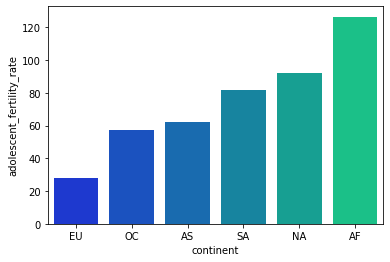

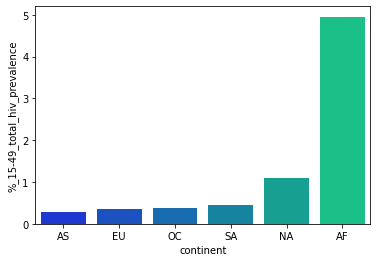

In [ ]:
continent_fert = df_final.groupby('continent')['adolescent_fertility_rate'].mean().reset_index()
continent_fert_sorted = continent_fert.sort_values(by = 'adolescent_fertility_rate')
cont_fert_plot = sns.barplot(x = 'continent', y = 'adolescent_fertility_rate', data = continent_fert_sorted, 
                                 palette = 'winter')
plt.show()

continent_hiv = df_final.groupby('continent')['%_15-49_total_hiv_prevalence'].mean().reset_index()
continent_hiv_sorted = continent_hiv.sort_values(by = '%_15-49_total_hiv_prevalence')
cont_hiv_plot = sns.barplot(x = 'continent', y = '%_15-49_total_hiv_prevalence', data = continent_hiv_sorted, 
                                 palette = 'winter')
plt.show()

### 3.2.2 Improved Sanitation Facilities

Continents like Europe, North America, South America, Australia, and parts of Northern Asia all have relatively high improved sanitation facilities rates. However, Africa improved sanitation facility rate is relatively low compared to the rest of the world, with their improved sanitation rates almost a third to half of the world. Even Southern Asia hs a relatively lower level with around half of the rest of the world.

In [ ]:
sannhiv_prim = df_final[['country_name','improved_sanitation_facilities_rate']]
sannhiv_prim  = sannhiv_prim.groupby('country_name').mean()
sannhiv_prim.reset_index(inplace=True)

fig = px.choropleth(data_frame = sannhiv_prim, locations="country_name", locationmode = 'country names',
                    color='improved_sanitation_facilities_rate', 
                    hover_name='improved_sanitation_facilities_rate', 
                    color_continuous_scale=px.colors.sequential.Sunset, 
                    title = 'Average Improved Sanitation Facilities Rate by Nation')

fig.show()

There appears to be a somewhat positive correlation upon first glance (limitation of dot plo), bu we know there is a moderate negative correlation from our heatmap between the x-axis of improved sanitation facilities rate and the y-axis of HIV prevalaence %. Although there are a few outliers that have extremely high improved sanitiation facilities rates and about 5% HIV, this could either be due to our averaging method of filling in null values based on similar regions or due to their baseline for improving their sanitary facilities being really low. Furthermore, the countries with below 60% improved sanitary facilities rate have the higher HIV prevalence %, which could support the hypothesis that worse sanitary facilities increase the transpirary rate of HIV. One positive could be that the countries witht he highest total HIV prevalence have middle levels of improved sanitation facilitites which could reflect investment into their infrastructure and effects that cannot be seen for some time lag.

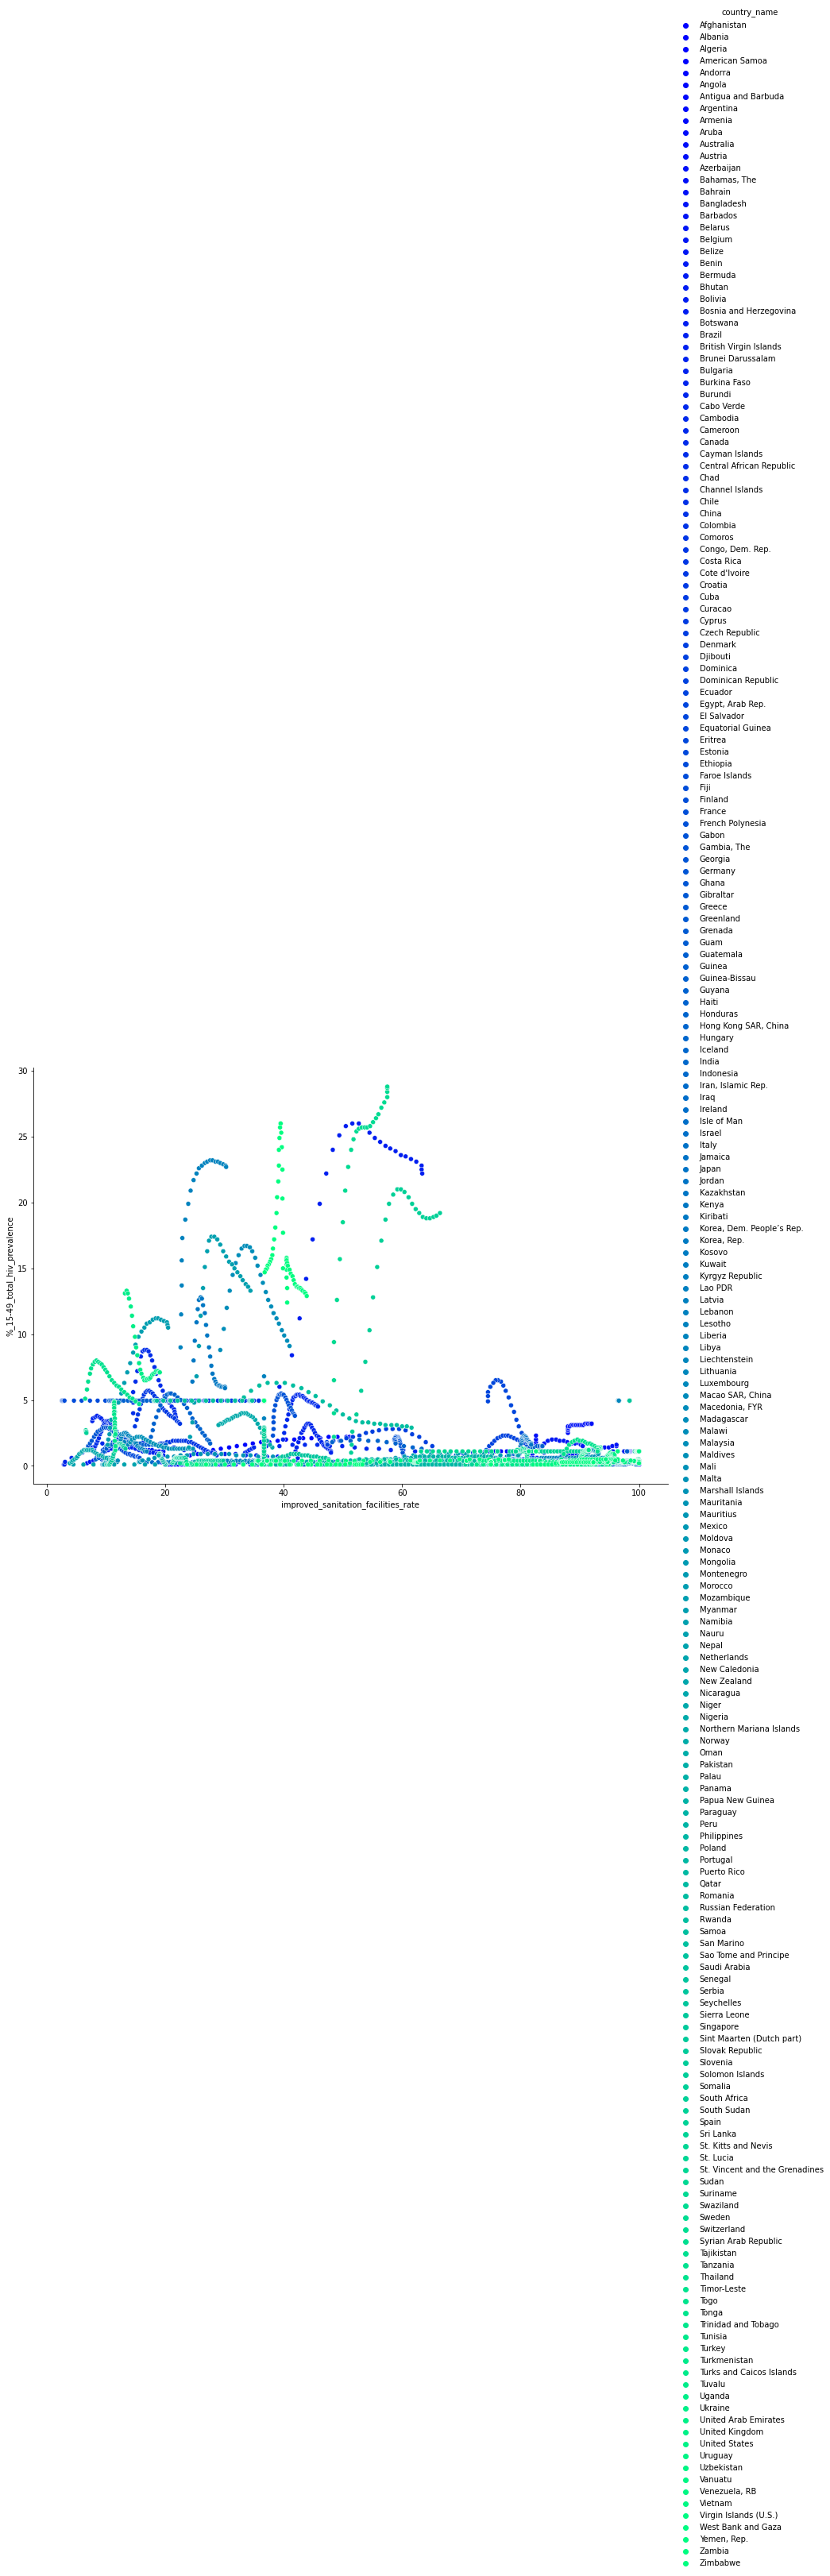

In [ ]:
hiv_san_countries= sns.relplot(x='improved_sanitation_facilities_rate', 
                                y='%_15-49_total_hiv_prevalence', palette = 'winter', 
                                data=df_final, hue = 'country_name', height=8, aspect=1.5);

It does not make sense to look at the highest improved sanitation facilities rate countries because they include Europe which there is no non-imputed HIV data for. Additionally, this analysis may not be as useful in general since it is measured improved sanitation facilities as a rate but not all of these countries had the same baseline to begin with. However, if we briefly look at the lowest improved sanitation facilities rate and highest HIV prevalence, there is overlap between Mozambique and Uganda which has been a common trend among many of these health metrics due to their higher HIV prevalance rate and overall low health and economic metrics/rates.

In [ ]:
san = df_final.groupby('country_name')['improved_sanitation_facilities_rate'].mean()
sancat_sorted = san.sort_values()


hiv_san = df_final.groupby('country_name')['%_15-49_total_hiv_prevalence'].mean()
hiv_san_sorted = hiv_san.sort_values()

print("Lowest Improved Sanitation Facilities Rate and Highest HIV Prevalence")
print(sancat_sorted.head(15));
print()
print(hiv_san_sorted.tail(15));

# print()
# print()
# print("Highest Improved Sanitation Facilities Rate and Lowest HIV Prevalence")
# print(sancat_sorted.tail(15));
# print()
# print(hiv_san_sorted.head(15));
# print()

Lowest Improved Sanitation Facilities Rate and Highest HIV Prevalence
country_name
Niger           23.064855
Chad            24.373783
Tanzania        24.507712
Madagascar      24.582712
Ghana           24.823783
Togo            24.988069
Sierra Leone    25.070212
Eritrea         25.359498
Ethiopia        25.586283
Burkina Faso    25.818426
Benin           25.834498
Guinea          26.246998
Mozambique      26.752355
Uganda          27.179141
Liberia         27.939693
Name: improved_sanitation_facilities_rate, dtype: float64

country_name
Sao Tome and Principe        4.952209
Seychelles                   4.952209
Central African Republic     5.579755
Tanzania                     5.670827
Mozambique                   6.326184
Kenya                        6.624398
Uganda                       6.667255
Namibia                      8.576184
Malawi                       8.776184
Zambia                       9.283327
South Africa                 9.663684
Lesotho                     10.936898

It's important to note that on a continent aggregated level, Africa has the least improved sanitation facilitites rate by a relative margin and that they have the highest HIV % prevalence rates among ages 15-49. This means taht even if Africa is starting at a lower baseline than Europe or North America, it is stll not making sanitation facility improvement at an eqivalent rate, so it will continue falling behind on this metric. We see that Europe has shown the most improvement for sanitaiton facilities by a relative margin and has the second lowest HIV prevalence rate. HIV works by desrying CD4 T cells which are white blood cells that help one's body fight disease, so having sanitized facilities prevents general viruses from passing on easily. It also can ensure general sanitary practices like not sharing needles or coming into contact with blood, which are two major ways that HIV passes. Thus, Africa may need to invest in their sanitary facilities to indirectly decrease HIV prevelance rates. Thus, we can takeaway that there could be a deeper connection between these variables.

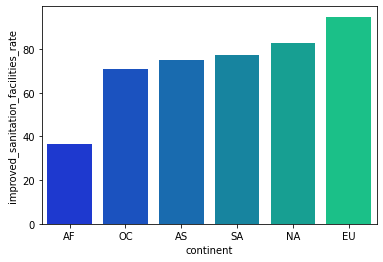

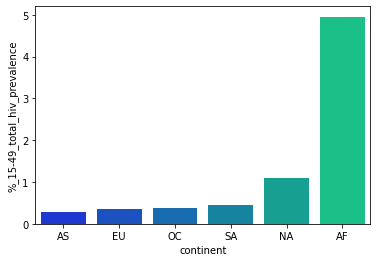

In [ ]:
continent_san = df_final.groupby('continent')['improved_sanitation_facilities_rate'].mean().reset_index()
continent_san_sorted = continent_san.sort_values(by = 'improved_sanitation_facilities_rate')
cont_san_plot = sns.barplot(x = 'continent', y = 'improved_sanitation_facilities_rate', data = continent_san_sorted, 
                                 palette = 'winter')
plt.show()

continent_hiv = df_final.groupby('continent')['%_15-49_total_hiv_prevalence'].mean().reset_index()
continent_hiv_sorted = continent_hiv.sort_values(by = '%_15-49_total_hiv_prevalence')
cont_hiv_plot = sns.barplot(x = 'continent', y = '%_15-49_total_hiv_prevalence', data = continent_hiv_sorted, 
                                 palette = 'winter')
plt.show()

### 3.2.3 Improved Water Source Rate

Looking at the map below, we have a significant amount of data to analyze without much required value imputation, especially compared to some other metrics. It's clear that the hghest average improved water source rates occurred in Europe, North America, South America, and Australia. Meanwhile, Africa was lagging behind significantly and Asia slightly with less water source improvement. We did some outside research (https://www.wvi.org/clean-water-sanitation-and-hygiene-wash/why-water-matters-hivaids) and found that although HIV cannot be directly spread by water, it is important because it can make one's immune system more vulnerable to the virus.

In [ ]:
sannhiv_prim = df_final[['country_name','improved_water_source_rate']]
sannhiv_prim  = sannhiv_prim.groupby('country_name').mean()
sannhiv_prim.reset_index(inplace=True)

fig = px.choropleth(data_frame = sannhiv_prim, locations="country_name", locationmode = 'country names',
                    color='improved_water_source_rate', 
                    hover_name='improved_water_source_rate', 
                    color_continuous_scale=px.colors.sequential.Sunset, 
                    title = 'Average Improved Water Source Rate by Nation')

fig.show()

In the dotplot, it looks like there is a positive correlation between improved water source rate and total HIV prevalence % for ages 15-49 which is interesting given that the heatmap above showed a moderately negative relationship. However, one possible reason for this there is an extremely high concentration of dots at high improved water source rate and extremely low HIV prevalence rates. To continue, we can also note that the same baseline problem occurs here as with improved sanitation facilities rate where different countries start at various baselines so it is difficult to compare countries one to one. Rather, we could see the dots with HIV water source improvement and HIV prevalence as a sign of the countries with high HIV prevalence rates investing in their water sources because they recognize it as a root of many health and immunity problems, including HIV.

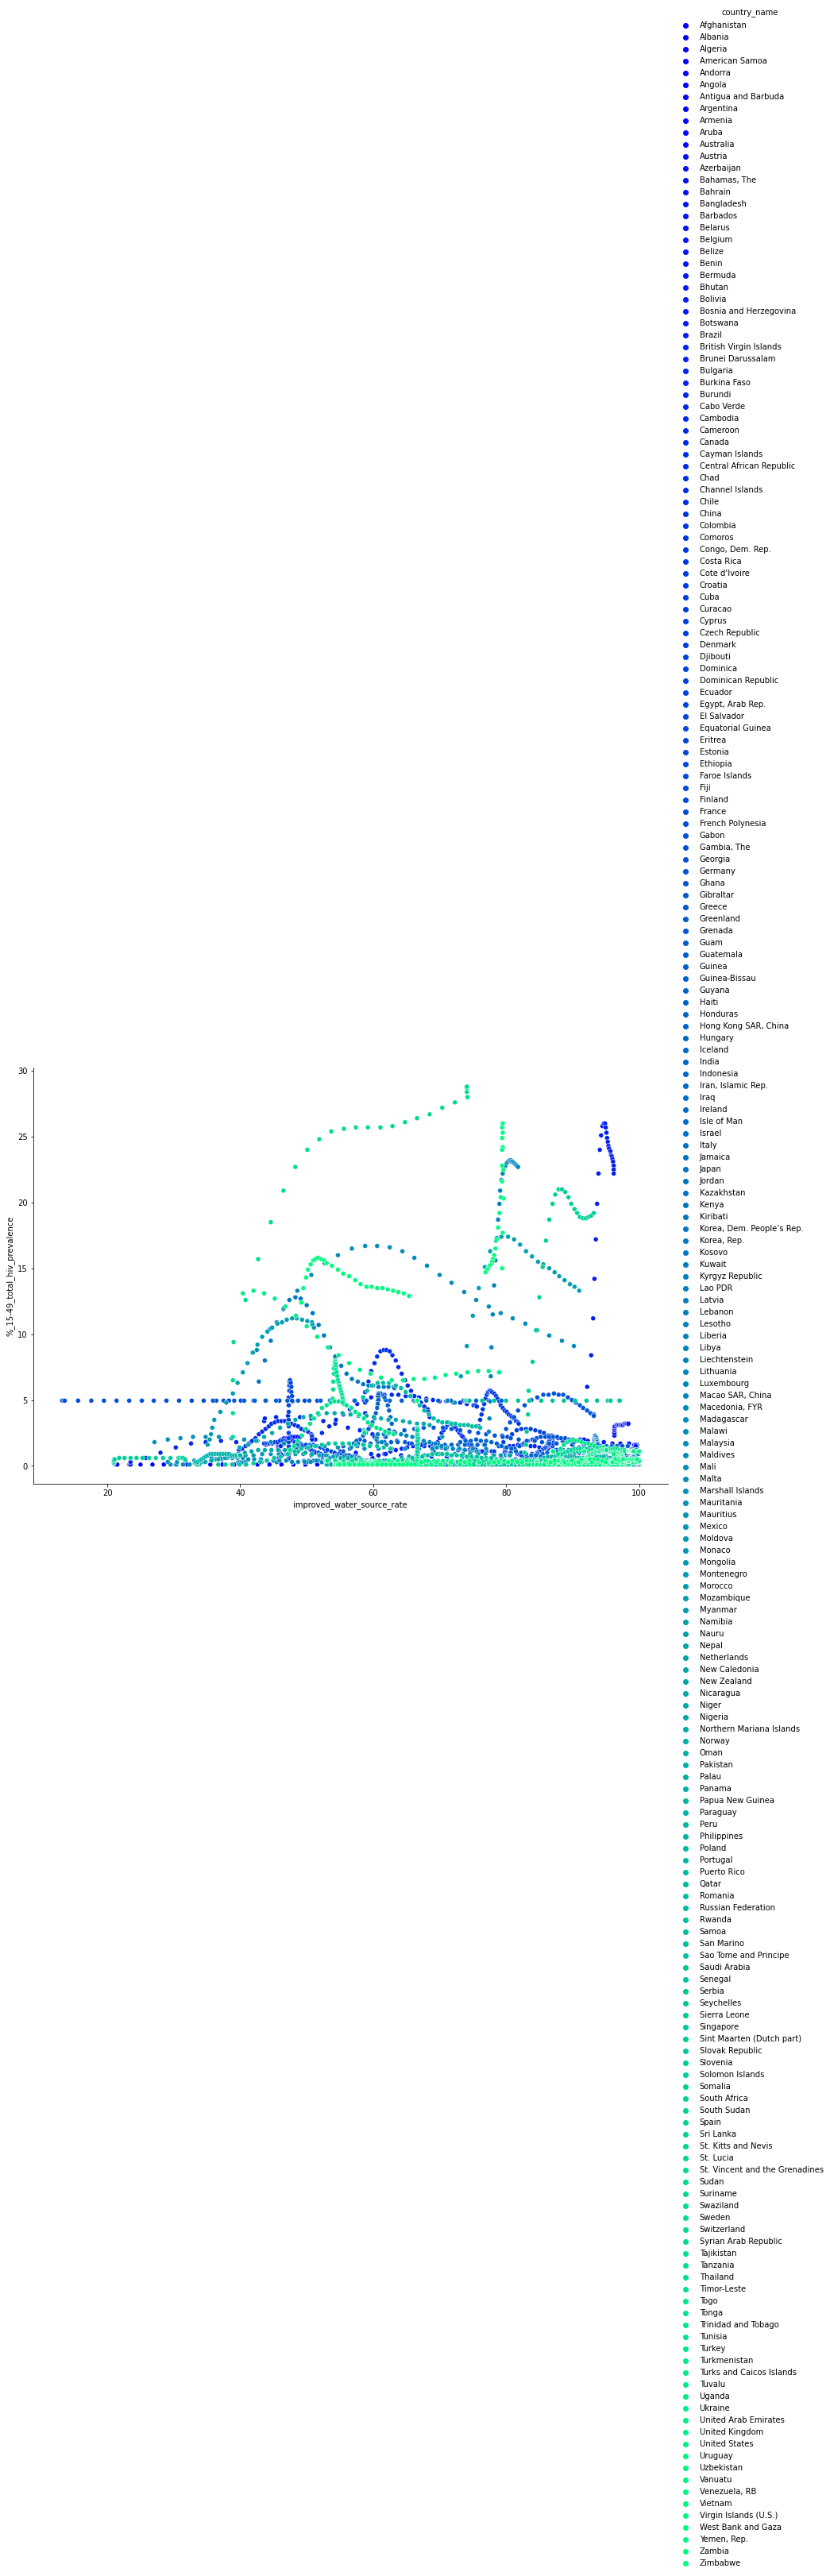

In [ ]:
hiv_san_countries= sns.relplot(x='improved_water_source_rate', 
                                y='%_15-49_total_hiv_prevalence', palette = 'winter', 
                                data=df_final, hue = 'country_name', height=8, aspect=1.5);

Again, we cannot look at the highest improved water source rates because they include countries in Europe but HIV prevalence does not. However, even on the flip side with the lowest improved water source rate and highest HIV prevalence, only Mozambique is in common which could indicate a less strong direct relationship between these variables while taken at an individual country level.

In [ ]:
water = df_final.groupby('country_name')['improved_water_source_rate'].mean()
watercat_sorted = water.sort_values()


hiv_water = df_final.groupby('country_name')['%_15-49_total_hiv_prevalence'].mean()
hiv_water_sorted = hiv_water.sort_values()

print("Lowest Improved Water Source Rate and Highest HIV Prevalence")
print(watercat_sorted.head(15));
print()
print(hiv_san_sorted.tail(15));

# print()
# print()
# print("Highest Improved Water Source Rate and Lowest HIV Prevalence")
# print(watercat_sorted.tail(15));
# print()
# print(hiv_san_sorted.head(15));
# print()

Lowest Improved Water Source Rate and Highest HIV Prevalence
country_name
Ethiopia             51.402514
Somalia              52.798100
Madagascar           54.431085
Mozambique           55.659657
Mauritania           56.543585
Chad                 57.016800
Niger                57.204300
Angola               57.281085
Congo, Dem. Rep.     58.000728
Sierra Leone         58.790014
Equatorial Guinea    59.108920
Mali                 59.765014
Eritrea              60.043585
Kenya                60.632871
Tanzania             61.081085
Name: improved_water_source_rate, dtype: float64

country_name
Sao Tome and Principe        4.952209
Seychelles                   4.952209
Central African Republic     5.579755
Tanzania                     5.670827
Mozambique                   6.326184
Kenya                        6.624398
Uganda                       6.667255
Namibia                      8.576184
Malawi                       8.776184
Zambia                       9.283327
South Africa      

However, on a continent aggregated level, there could be more relation between these variables. Specifically, it appears that Africa has the lowest average improved water source rate and clearly has the highest HIV prevalence rate, which could support our hypothesis that not clean water can influence immune system strength and consequently HIV rates. This is also seen on the flip side where Europe has dramatically improved their water source rate across the entire continent and they have the second lower continent aggregated HIV prevalence rate.

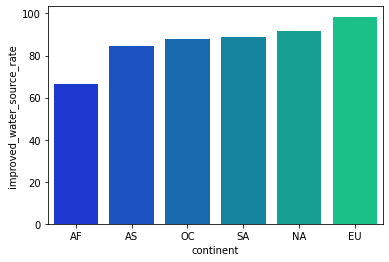

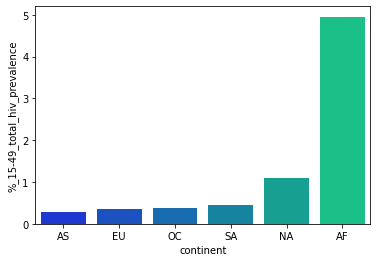

In [ ]:
continent_water = df_final.groupby('continent')['improved_water_source_rate'].mean().reset_index()
continent_water_sorted = continent_water.sort_values(by = 'improved_water_source_rate')
cont_water_plot = sns.barplot(x = 'continent', y = 'improved_water_source_rate', data = continent_water_sorted, 
                                 palette = 'winter')
plt.show()

continent_hiv = df_final.groupby('continent')['%_15-49_total_hiv_prevalence'].mean().reset_index()
continent_hiv_sorted = continent_hiv.sort_values(by = '%_15-49_total_hiv_prevalence')
cont_hiv_plot = sns.barplot(x = 'continent', y = '%_15-49_total_hiv_prevalence', data = continent_hiv_sorted, 
                                 palette = 'winter')
plt.show()

## **3.3** Education Indicators

Compared to the other categories, there is a higher level of correlation between the three school enrollment categories (primary, secondary, and teritiary). Additionlly, of these, secondary has the highest negative correlation, which makes sense because this is the same age in which people start engaging in sexual relationships that can transmit HIV in the first place. Additionally, the drop off for tertiary might stem because typically, a specific subset of more wealthy or overall more education people attend college-level schooling, which could also mean they have more access to contraceptive protection.

Text(0.5, 1.0, 'Correlation Matrix Heatmap of Economic and HIV Indicators')

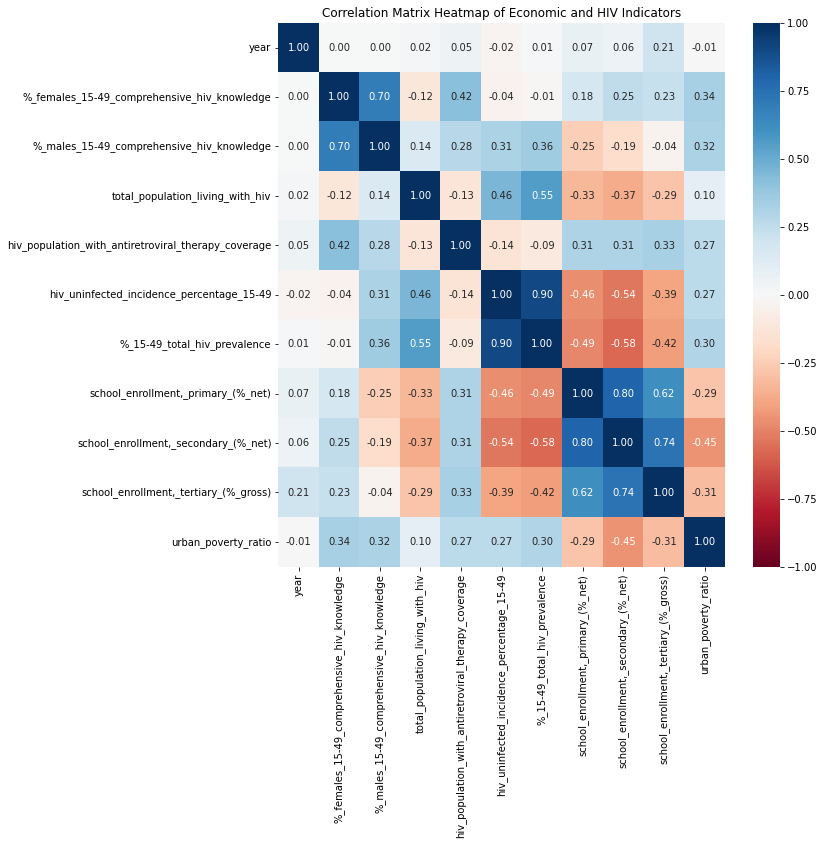

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
df_edu = df_final.drop(columns = ['health_expenditure_per_capita,_ppp',
                                  'health_expenditure,_public_(%_of_total_health_expenditure)',
                                  'health_expenditure,_total_(%_of_gdp)',
                                  'out-of-pocket_health_expenditure_(%_of_total_expenditure_on_health)',
                                  'total_unemployment_ratio',
                                  'urban_population_ratio',
                                  'adolescent_fertility_rate',
                                  'improved_sanitation_facilities_rate', 
                                  'improved_water_source_rate',
                                  'total_unemployment_ratio',
                                  'urban_population_ratio',
                                  ])

correlation_matrix = df_edu.corr()
ax = sns.heatmap(correlation_matrix, vmax=1, vmin=-1, cmap='RdBu', annot = True, fmt = '.2f')
ax.set_title('Correlation Matrix Heatmap of Economic and HIV Indicators')

To begin, we decided to map primary, secondary, and tertiary school enrollment rates to see how they shifted over time. Begininng with the primary school enrollment rates, they are extremely high, almost 90% or more in South America, Central Asia, and South/Southeast Asia but they are still lower in Africa. Note that the upperbound appears to be 100% and the lower bound appears to be slightly less than 50%, of which these lower rates all stem from Africa.

In [ ]:
eduhiv_prim = df_edu[['country_name','school_enrollment,_primary_(%_net)']]
eduhiv_prim  = eduhiv_prim.groupby('country_name').mean()
eduhiv_prim.reset_index(inplace=True)

fig = px.choropleth(data_frame = eduhiv_prim, locations="country_name", locationmode = 'country names',
                    color='school_enrollment,_primary_(%_net)', hover_name='school_enrollment,_primary_(%_net)', 
                    color_continuous_scale=px.colors.sequential.Sunset, 
                    title = 'Average Primary School Enrollment by Nation')

fig.show()

Moving onto secondary school enrollment, the rates drop by at around 10-20% across the board, but even more significantly in Southern Africa, Western Africa, and Southeast Asia. For those regions, the drop off rate was 30-40% for certain countries, which shows there is a high attrition rate between primary and secondary school enrollment. We will explore secondary school enrollment primarily because it has the highest correlation with HIV and is more representative of the overall education levels than primary which is relatively high across the board and tertiary which is relatively low across the board. Note that the maximum for secondary school enrollment is about 90% and the minimum is about 20%.

In [ ]:
eduhiv_sec = df_edu[['country_name','school_enrollment,_secondary_(%_net)']]
eduhiv_sec  = eduhiv_sec.groupby('country_name').mean()
eduhiv_sec.reset_index(inplace=True)

fig = px.choropleth(data_frame = eduhiv_sec, locations="country_name", locationmode = 'country names',
                    color="school_enrollment,_secondary_(%_net)", hover_name='school_enrollment,_secondary_(%_net)', 
                    color_continuous_scale=px.colors.sequential.Sunset, 
                    title = 'Average Secondary School Enrollment by Nation')

fig.show()

Compared to the primary and secondary maps, there is relatively less tertiary school enrollment across South America, Africa, and Asia, which makes sense given that with each level of education, there will be a drop off rate as people choose to enter the workforce or have families rather than pursuing more education. We can see that South America and central Asia still have the highest rates among these continents and Western and Southern Africa still have the lowest rates. However, note that even the highest countries still only have ~70% enrollment and this does not necessarily mean they completed college or their form of tertiary schooling. The drop of rate from 90% being the max and 20% being the lowest to 70% being the max and ~that0% being the lowest is significant.

In [ ]:
eduhiv_ter = df_edu[['country_name','school_enrollment,_tertiary_(%_gross)']]
eduhiv_ter  = eduhiv_ter.groupby('country_name').mean()
eduhiv_ter.reset_index(inplace=True)

fig = px.choropleth(data_frame = eduhiv_ter, locations="country_name", locationmode = 'country names',
                    color='school_enrollment,_tertiary_(%_gross)', hover_name='school_enrollment,_tertiary_(%_gross)', 
                    color_continuous_scale=px.colors.sequential.Sunset, 
                    title = 'Average Tertiary School Enrollment by Nation')

fig.show()

In the following graph, we plot a dot plot showing the relation between secondary school enrollment (x-axis) and total HIV prevalence for 15-49. We made the hue countries as well to slightly distinguish between the dots. However, as clearly shown, there is a slight negative correlation between these features, which is one of the first times among all these dot plots that the true correlation has been relatively clear upon looking. This is because a majority of countries have hiv prevalence rates really close to zero, but note that a congregation of these zero HIV prevalence points happens at much higher secondary school enrollment rates. Additionally, it is clear that a majority of countries that have higher HIV prevalence rates above 5% have secondary school enrollment rates of below 40 and there are only a few near 60%.

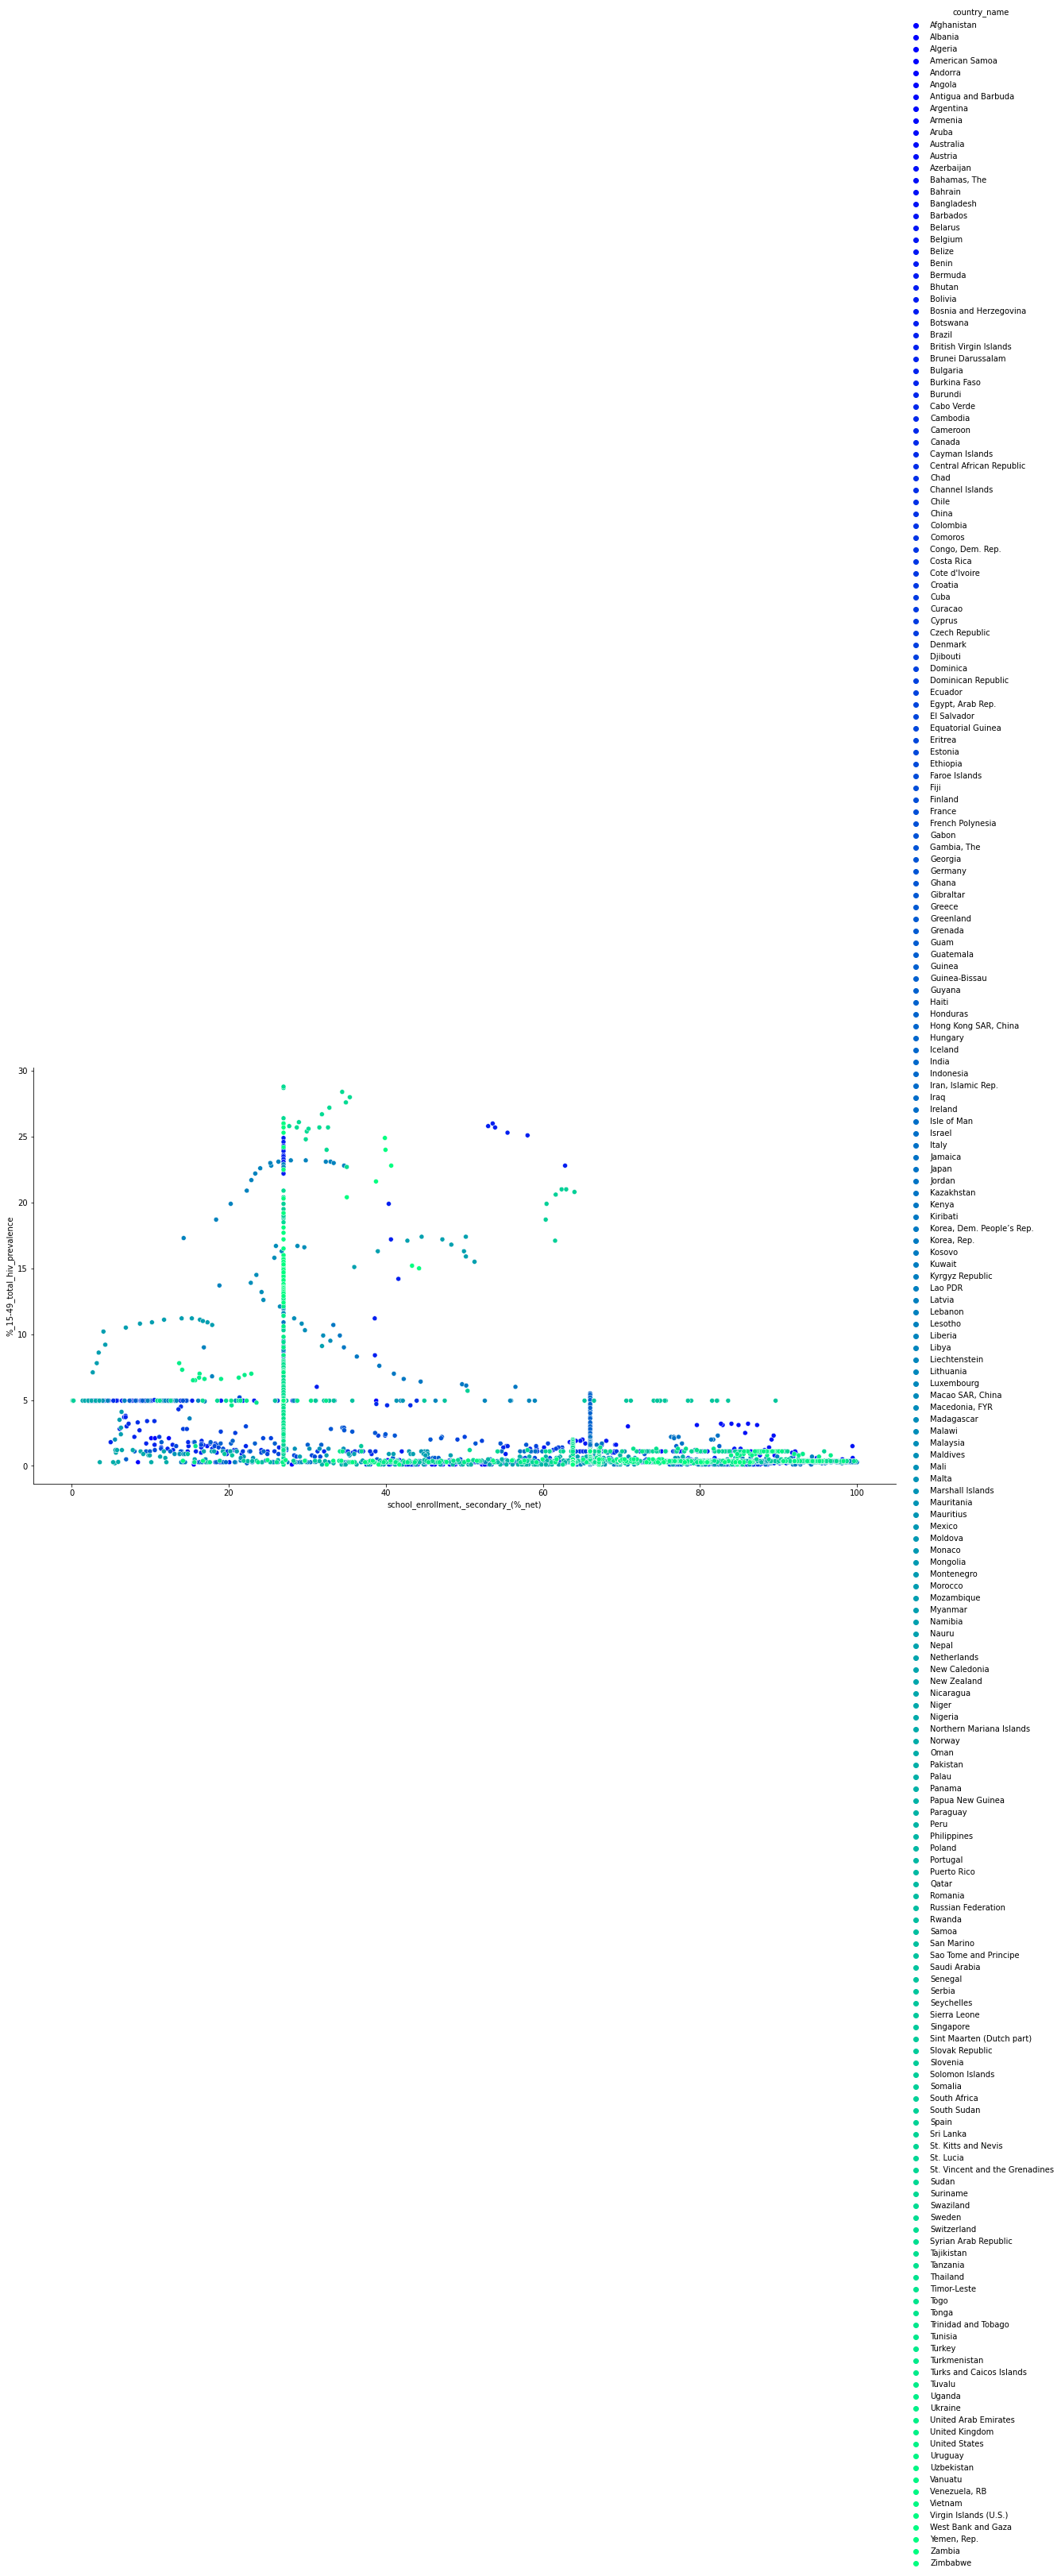

In [ ]:
hiv_education_countries= sns.relplot(x='school_enrollment,_secondary_(%_net)', y='%_15-49_total_hiv_prevalence', palette = 'winter', 
                                              data=df_edu, hue = 'country_name', height=8, aspect=2);

Looking first at the lowest education and highest HIV prevalence, there are overlaps including Mozambique, Lesotho, Central Africa Republic, and Uganda. This indicates that there could be a connection between low education rates and high HIV prevalence. In fact, according to outside research, HIV typically emerges due to a lack of knowledge of safe sex practices as well as lack of access to contraceptives. This follows in line with this outside research and also, since most of these countries are concentrated in similar regions in Africa, it points to where global resources should be invested.

Looking on the other side at the highest education and lowest HIV prevalence countries, it is hard to compare because European countries do not have their own HIV data.

In [ ]:
education = df_edu.groupby('country_name')['school_enrollment,_secondary_(%_net)'].mean()
educat_sorted = education.sort_values()


hiv_education = df_edu.groupby('country_name')['%_15-49_total_hiv_prevalence'].mean()
hiv_educat_sorted = hiv_education.sort_values()

print("Lowest Education and Highest HIV Prevalence")
print(educat_sorted.head(15));
print()
print(hiv_educat_sorted.tail(15));
# print()
# print()
# print("Highest Education and Lowest HIV Prevalence")
# print(educat_sorted.tail(15));
# print()
# print(hiv_educat_sorted.head(15));
# print()

Lowest Education and Highest HIV Prevalence
country_name
Niger                       19.341894
Mozambique                  20.997249
Burkina Faso                21.177539
Burundi                     21.684963
Lesotho                     22.294044
Cameroon                    24.527368
Djibouti                    24.713811
Chad                        24.959678
Central African Republic    25.015918
Somalia                     25.062033
Guinea                      25.096009
Uganda                      25.133744
Angola                      25.338221
Mali                        25.348879
Guinea-Bissau               25.354024
Name: school_enrollment,_secondary_(%_net), dtype: float64

country_name
Sao Tome and Principe        4.952209
Seychelles                   4.952209
Central African Republic     5.579755
Tanzania                     5.670827
Mozambique                   6.326184
Kenya                        6.624398
Uganda                       6.667255
Namibia                      8.576

Looking at the correlation matrix below, I wanted to explore the specific relation between education and comprehensive HIV knowledge for both genders. Interestingly, males has a negative correlation and females have a positive. As the level of enrollment in school increases from primary to secondary to tertiary, the males level of comprehensive knowledge of HIV becomes less negatively correlated and closer towards no correlations. The female level of comprehensive knowledge shows a higher positive correlation between primary and secondary and a slightly lower for tertiary. This is fascinating because it implies that as primary schooling levels increase, the male comprehensive HIV knowledge decreases, which is contrary to intuition. However, the increase in primary schooling correlates to an increase in female comprehensive HIV knowledge which is on par with our intuition but I thought it would have a higher correlation. This could indicate that education by itself or the way the current education systems are set up is not an extremely effective way to increase knowledge and understanding of HIV. 

Text(0.5, 1.0, 'Correlation Matrix Heatmap HIV Knowledge and Education Rates')

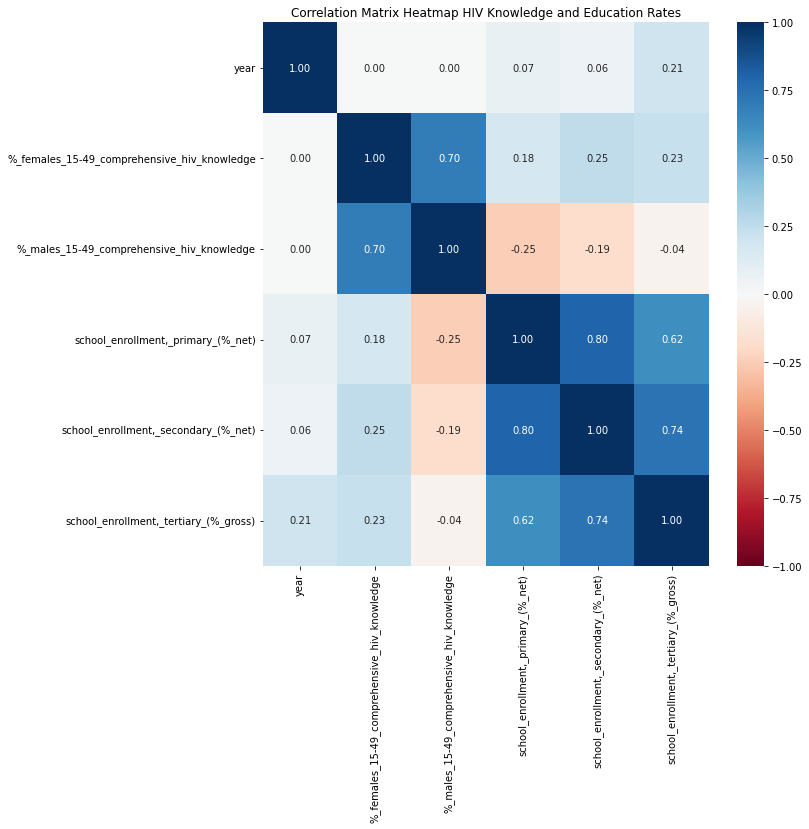

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
df_edu_zoom = df_final.drop(columns = [
                                    'adolescent_fertility_rate', 'total_population_living_with_hiv',
                                    'hiv_population_with_antiretroviral_therapy_coverage',
                                    'health_expenditure_per_capita,_ppp',
                                    'health_expenditure,_public_(%_of_total_health_expenditure)',
                                    'health_expenditure,_total_(%_of_gdp)',
                                    'improved_sanitation_facilities_rate', 'improved_water_source_rate',
                                    'hiv_uninfected_incidence_percentage_15-49',
                                    'out-of-pocket_health_expenditure_(%_of_total_expenditure_on_health)',
                                    '%_15-49_total_hiv_prevalence', 'total_unemployment_ratio',
                                    'urban_population_ratio', 'urban_poverty_ratio'
                                  ])

correlation_matrix = df_edu_zoom.corr()
ax = sns.heatmap(correlation_matrix, vmax=1, vmin=-1, cmap='RdBu', annot = True, fmt = '.2f')
ax.set_title('Correlation Matrix Heatmap HIV Knowledge and Education Rates')

To take a deeper look, we decided to plot maps for both male and female knowledge of HIV and we found an explanation. Our value imputation for female HIV knowledge caused entire continents to be grouped together, with only some other countries in Africa having gathered this knowledge. Likewise, for Male HIV knowledge, there is data for specific countries in Africa, but none really beyond that. However, it is interesting to note that even then, Africa has higher male knowledge of HIV than continents taken as a whole, we makes sense give how prevalent HIV is in the continent. This is not the same for females though. 

In [ ]:
edufem_prim = df_edu[['country_name','%_females_15-49_comprehensive_hiv_knowledge']]
edufem_prim  = edufem_prim.groupby('country_name').mean()
edufem_prim.reset_index(inplace=True)

fig1 = px.choropleth(data_frame = edufem_prim, locations="country_name", locationmode = 'country names',
                    color= '%_females_15-49_comprehensive_hiv_knowledge', hover_name='%_females_15-49_comprehensive_hiv_knowledge', 
                    color_continuous_scale=px.colors.sequential.Sunset, 
                    title = 'Female HIV Comprehensive Knowledge by Nation')

fig1.show()


edumale_prim = df_edu_zoom[['country_name','%_females_15-49_comprehensive_hiv_knowledge', '%_males_15-49_comprehensive_hiv_knowledge']]
edumale_prim  = edumale_prim.groupby('country_name').mean()
edumale_prim.reset_index(inplace=True)

fig2 = px.choropleth(data_frame = edumale_prim, locations="country_name", locationmode = 'country names',
                    color= '%_males_15-49_comprehensive_hiv_knowledge', hover_name='%_males_15-49_comprehensive_hiv_knowledge', 
                    color_continuous_scale=px.colors.sequential.Sunset, 
                    title = 'Male HIV Comprehensive Knowledge by Nation')

fig2.show()

#4.0 EDA: Continent Aggregated Analysis

In the graph below, it is clear that Africa's bottom quartile for % 15-49 Total HIV Prevalence is in line with the other continents averages and even upper bounds. Meanwhile, among the other continents, Europe and Oceania appear to have the lowest HIV Prevalence rates which are in line with our analysis from above, but North America's is slightly higher which is surprising. However, after looking at the countries who data is available, it is clear that Mexico is the primary driver and thus might be overestimating the overall continents HIV prevalence rates given that there is no data for Canada and the US.

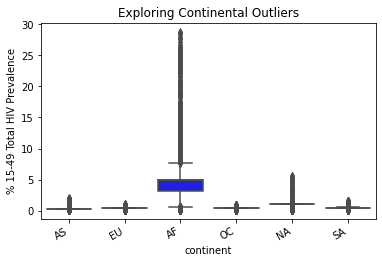

In [ ]:
# In order to demonstrate the above point that the mean might be skewed but also to see if there is any continent that is relatively uniform
continent_outliers = sns.boxplot(x='continent',y='%_15-49_total_hiv_prevalence', data = df_final, color = 'blue')

continent_outliers.get_figure().autofmt_xdate()
continent_outliers.set_xlabel('continent')
continent_outliers.set_ylabel('% 15-49 Total HIV Prevalence')
continent_outliers.set_title('Exploring Continental Outliers')
plt.show()

In the violinplot and corresponding table right below that in the following cell, it is clear that even using a median creates a skewed plot where Africa's Median % 15-49 Total HIV Prevalence is significantly higher than the rest of the world, again noting the reason for why North America might be in second.However, we can see that Africa's violin plot extends high but its midpoint is still relatively near the 5% mark. Since violinplots also show density and Africa's is very skinny throughout, it shows that there is a wide variety of HIV prevalence rates among all the countries whereas the other continents have wider violinplots indicating there is more consistency/density.

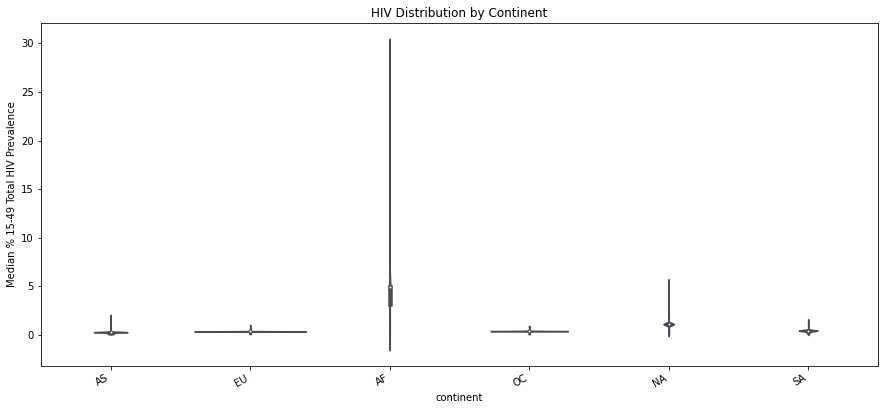

In [ ]:
f,ax = plt.subplots(figsize=(15, 7))
aggrog = sns.violinplot(x='continent',y='%_15-49_total_hiv_prevalence',data = df_final, color='blue')

aggrog.get_figure().autofmt_xdate()
aggrog.set_xlabel('continent')
aggrog.set_ylabel('Median % 15-49 Total HIV Prevalence')
aggrog.set_title('HIV Distribution by Continent')
plt.show()

In [ ]:
joined_continents_df = df_final.groupby(['continent']).median()
joined_continents_df.reset_index(inplace=True)
joined_continents_df[['continent','%_15-49_total_hiv_prevalence']]

,continent,%_15-49_total_hiv_prevalence
0,AF,4.952209
1,AS,0.276756
2,EU,0.359890
3,NA,1.103590
4,OC,0.384615
5,SA,0.440064


Overall, this section simply highlighted how prevalent HIV was in Africa compared to the rest of the world. It also indicates that there are possible geographic ramifiations of HIV such that because it is a virally spread disease, it can transcend borders and stay prevalent among regions.

# **5** Modeling

In this section we explore both regression and classification models to predict the HIV prevalence given the indicators we chose in section **2**.  

## **5.1** Preprocessing

### **5.1.1** Split into Features and Label

We first define the DataFrames for our features and label. Note that we include all the indicators as well as the country names and years as the features. The label DataFrame consists of a single column which contains the indicator value for *Prevalence of HIV, total (% of population ages 15-49)*. We first use regression model to predict the prevalence percentage so the labels are the original percentage values.

In [ ]:
features = df_final[['country_name',
                     'year',
                     'adolescent_fertility_rate',
                     'improved_sanitation_facilities_rate',
                     'improved_water_source_rate',
                     #'total_population_living_with_hiv',
                     'health_expenditure_per_capita,_ppp',
                     'health_expenditure,_public_(%_of_total_health_expenditure)',
                     'health_expenditure,_total_(%_of_gdp)',
                     #'hiv_uninfected_incidence_percentage_15-49',
                     'out-of-pocket_health_expenditure_(%_of_total_expenditure_on_health)',
                     #'%_15-49_total_hiv_prevalence',
                     'total_unemployment_ratio',
                     'urban_population_ratio'
                     ]]

In [ ]:
hiv_prevalence = df_final[['%_15-49_total_hiv_prevalence']]

### **5.1.2** One-hot-encoding

The country_name column contains categorical values so we need to convert it into numerical vectors using one-hot-encoding before we can use it for modeling.

In [ ]:
features = pd.get_dummies(features, columns=['country_name'])

### **5.1.3** Compute Numerical Feature Correlation

Before running our models we first plot the correlation matrix of the features as a simple check of multicollinearity. As we can see from the plot, there are several features which exhibit relatively high correlation. The *adolescent_fertility_rate* is negatively correlated with *improved_sanitation_facilities_rate* and *improved_water_source_rate*, and *improved_sanitation_facilities_rate* and *improved_water_source_rate* are also positively correlated. In addition, *health_expenditure_per_capita,_ppp* is positively correlated with *urban_population_ratio*.

Text(0.5, 1.0, 'Correlation Matrix Heatmap of all Indicators')

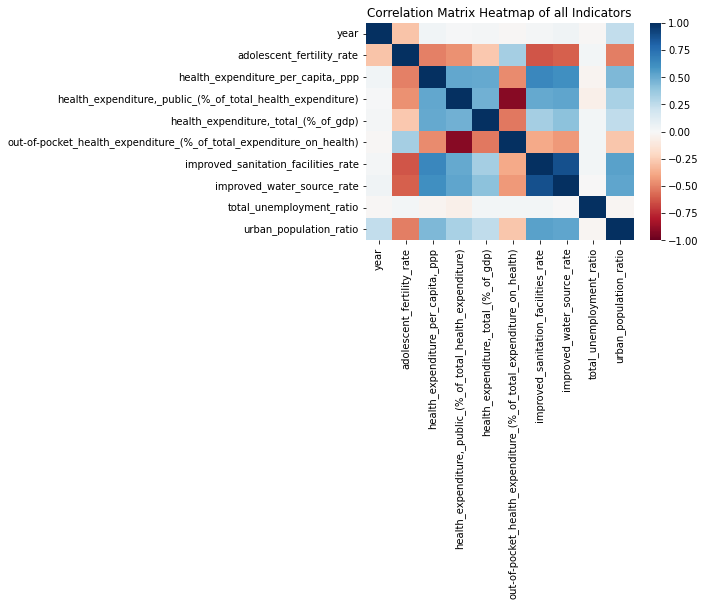

In [ ]:
numerical_features = features[['year',
                               'adolescent_fertility_rate',
                               'health_expenditure_per_capita,_ppp',
                               'health_expenditure,_public_(%_of_total_health_expenditure)',
                               'health_expenditure,_total_(%_of_gdp)',
                               'out-of-pocket_health_expenditure_(%_of_total_expenditure_on_health)',
                               'improved_sanitation_facilities_rate',
                               'improved_water_source_rate',
                               'total_unemployment_ratio',
                               'urban_population_ratio'
                              ]]
correlation_matrix = numerical_features.corr()
ax = sns.heatmap(correlation_matrix, vmax=1, vmin=-1, cmap='RdBu')
ax.set_title('Correlation Matrix Heatmap of all Indicators')

### **5.1.4** Split Data into Train and Test

We split the dataset into train and test with a ratio of 0.8/0.2.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, hiv_prevalence, test_size=0.2)

## **5.2** Regression Models

### **5.2.1** Linear Regression

In this section we first train a simple Unregularized Linear Regression on the selected indicators to predict the percentage value of hiv prevalence. We report the R Square (R2) score as the model evaluation metric. 

The R2 score measures how much variability in the dependent variable is explained by the model. The R2 score ranges from 0 to 1 and a higher value indicates a better model performance. 

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)
score = reg.score(x_test, y_test)

print(score)

0.7260082495918085


### **5.2.2** Ridge Regression

As we have seen in section **3.1.3**, there exists multicollinearity issues in our features. So we additionally train a Ridge Regression model with the aim to mitigate this issue.

Ridge regression is a regularized model that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large. This results in predicted values being far away from the actual values. 

In [ ]:
from sklearn.linear_model import Ridge

reg_ridge = Ridge(alpha=10).fit(x_train, y_train)
y_pred = reg_ridge.predict(x_test)
ridge_score = reg_ridge.score(x_test, y_test)

print(ridge_score)

0.7216696596345125


### **5.2.3** Lasso Regression

Finally we use another type of regularization called Lasso Regression. Unlike Ridge Regression, Lasso regularization allows the model to assign non-important features weights of value 0. This feature makes Lasso regularization good for making a sparse linear model where fewer features are used for prediction.

In [ ]:
from sklearn.linear_model import Lasso

reg_lasso = Lasso().fit(x_train, y_train)
y_pred = reg_lasso.predict(x_test)
lasso_score = reg_lasso.score(x_test, y_test)

print(lasso_score)

0.4910772839399954


**Observation on regression models**

According to the R2 score we see that the unregularized linear regression model in fact gives the best performance. The performance of Ridge Regression is slightly worse, and Lasso Regression has a much lower score. This may suggest that we are not having many features that are highly redundant, so training a sparse linear model will lose important features that contribute to the right prediction.

## **5.3** Classification Models

In this section we turn to classification models and we try to use them to predict a categorical value for the hiv prevalence. Previously we directly used the percentage value as the label, but now we will divide these values into 3 categories indicating a low/middle/high HIV prevalence rate. 

For simplicity we may attempt to assign the class labels using the 3 ranges [0,0.33), [0.33, 0.66), and [0.66,1]. However it is almost impossible for the HIV prevalence rate to reach a middle or high range according to this definition, and the highest value of HIV prevalence is just around 0.25 in our dataset. Therefore, we instead decide the thresholds by sorting the HIV prevalence values in our dataset and select the values corresponding to the datapoints at the top 33% and top 66% position. 

We report the test accuracy to evaluate the models' performances.

### **5.3.1** Get Class Labels

**Create 3-class Labels for hiv prevanence level** : We convert the original hiv prevenance level into high/mid/low categories according to the value range, and the labels are 2/1/0 respectively.

In [ ]:
# Get value range for hiv_prevalence, then divide equally into low/mid/high.
prevalence_df = df_final['%_15-49_total_hiv_prevalence'].sort_values().reset_index()['%_15-49_total_hiv_prevalence']
low_threshold = prevalence_df[len(prevalence_df) // 3]
middle_threshold = prevalence_df[len(prevalence_df) * 2 // 3]

df_final['hiv_prevalence_class'] = df_final['%_15-49_total_hiv_prevalence'].apply(lambda x: 0 if x < low_threshold else 2 if x > middle_threshold else 1)

<ipython-input-58-31971db8c70e>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Get labels dataframe
labels = df_final['hiv_prevalence_class']

We use a barplot to show the number of datapoints for each category. We can see that the datapoints are roughly balanced. But of course it is not perfectly divided into 3 groups because there are datapoints with the same values.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



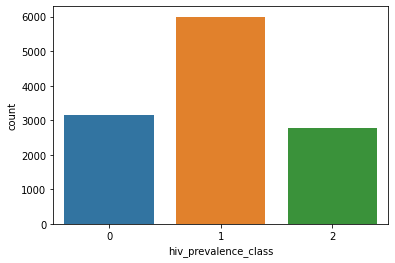

In [ ]:
# Plot counts for each class
sns.countplot(labels)

In [ ]:
# Combine features and labels into 1 dataframe
feature_label_df = pd.concat([features, labels], axis=1)

### **5.3.2** Split Data into Train and Test

Split the dataset into train and test. We still use a ratio of 0.8/0.2

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

### **5.3.3** Logistic Regression

####Unregularized Logistic Regression

The first and simplest model we use for classification is Unregularized Logistic Regression. Logistic Regression is simple and fast to train. However, the main limitation of it is that it is a linear model, which means that the decision boundry produced by the model is always linear.

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=100).fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
log_acc = log_reg.score(x_test, y_test)
print(log_acc)

0.8458961474036851


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



#### ElasticNet Logistic Regression

Just like how we used Ridge and Lasso regularizations for our linear regression model, here we also consider a regularized version of logistic regression. 

We use ElasticNet, which essentially consists of both Ridge and Lasso regularization terms with a weighting factor to determine the strengths of each. When the ratio is set to 0 and 1, it would be identical to Ridge and Lasso regularization. Here we use *l1_ratio*= 0.5

In [ ]:
from sklearn.linear_model import LogisticRegression

log_en_reg = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5 , max_iter=100).fit(x_train, y_train)
y_pred = log_en_reg.predict(x_test)
log_en_acc = log_en_reg.score(x_test, y_test)
print(log_en_acc)

0.8119765494137353


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



###**5.3.4** Decision Trees

As mentioned in the previous section, Logistic Regression cannot capture any non-linear relationships. Therefore we consider a more powerful yet efficient family of models - Decision Trees - to perform the classification task. 

#### Random Forest

We start with the Random Forest model, which is just an ensemble of decision trees trained in parallel. Random Forest has the advantage of smaller possibility of overfitting than a single Decision Tree. However, in general it does not increase the performance too much, because each tree is trained independently.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(x_train, y_train)
y_pred = rf.predict(x_test)
rf_acc = rf.score(x_test, y_test)
print(rf_acc)

0.9882747068676717


#### Gradient-Boosted Tree

Gradient-Boosted Tree uses the technique called boosting to increase the modeling power of regular Decision Trees. Remember we mentioned that Random Forest only mitigates overfitting and usually does not give much performance increase. However, Gradient-Boosted Tree is designed to build upon weak learners and eventually increase the model performance. One tradeoff is that since Gradient-Boosted Tree is trained sequentially, it is less efficient in terms of training.

Therefore, Gradient-Boosted Tree in general should give higher accuracy than Random Forest. However, because our dataset has a lot of duplicate values caused by many missing values being filled with average value, the use of Gradient-Boosted Tree does not give higher accuracy.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbt = GradientBoostingClassifier().fit(x_train, y_train)
y_pred = gbt.predict(x_test)
gbt_acc = gbt.score(x_test, y_test)
print(gbt_acc)

0.9489112227805695


**Observation on classification models:**

Not surprisingly, we see that Decision Tree does have a much better performance than Logistic Regression. 

Also, Gradient-Boosted Tree is the best among all of them as expected.

### **5.3.5** PCA

Principle Component Analysis (PCA) is a powerful algorithm for reducing the dimension of features. In addition, by finding the directions that maximally retain the data variance, PCA is especially useful for eliminating multicollinearity in our data.

As we've seen in section **3.1.3**, we have several features - *adolescent_fertility_rate*, *improved_sanitation_facilities_rate* and *improved_water_source_rate*, *health_expenditure_per_capita,_ppp* - that exhibits high correlation. Therefore, by removing this multicollinearity with PCA, we should be able to get noticeable performance increase using simple Logistic Regression

####**Initial PCA**

As a first step, we instantiate and fit `PCA` from scikit-learn on our training set. We are not reducing the dimensionality of our data in this step but rather trying to find what would be the ideal number of Principal Components to choose. So for this step, we keep all Principal Components.

Also note that PCA is **not** scale-invariant, so we need to first normalize the data with the *StandardScaler*.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

pca = PCA(n_components=scaled_x_train.shape[1])
pca.fit(scaled_x_train)

PCA(n_components=224)

_**Cumulative Explained Variance Ratios**_

We create an array of explained variance ratios and store it into a variable called `explained_variance_ratios`. 

We also calculate the _cumulative_ explained variance ratios and store that into another variable called `cum_evr`.

In [ ]:
# Cumulative Explained Variance Ratios

explained_variance_ratios = pca.explained_variance_ratio_
cum_evr = sum(explained_variance_ratios)

Now we plot the cumulative explained_variance_ratio against the number of components to decide the number of components we should keep. 

There is a horizontal line that represents the 80% of the variance as a threshold.

Text(0, 0.5, 'Explained variance Ratio')

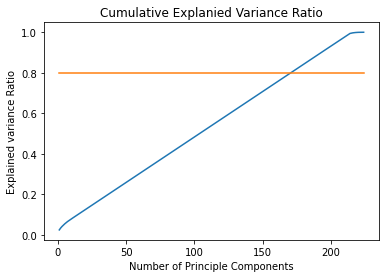

In [ ]:
plt.plot(np.arange(1, len(explained_variance_ratios)+1), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.arange(1, len(explained_variance_ratios)+1), [0.80]*len(explained_variance_ratios))

# Plot
plt.title('Cumulative Explanied Variance Ratio')
plt.xlabel('Number of Principle Components')
plt.ylabel('Explained variance Ratio')

####**Final PCA**

Using our results above, we can then decide the number of components to keep.

We choose a number (`n`) that explains **at least 80% of total variance** in the dataset, then re-fit and transform our PCA on the training set using the number of components.

In [ ]:
n = 0
for c in np.cumsum(pca.explained_variance_ratio_):
  n += 1
  if c >= 0.8:
    break

pca = PCA(n_components=n)

x_train_pca = pca.fit_transform(scaled_x_train)

x_test_pca = pca.transform(scaled_x_test)

#### **Logistic Regression with PCA**

Now we are ready to fit our Unregularized Logistic Regression model using our new dataset after performing PCA.

The accuracy immediately increased from 0.822 to 0.902 after applying PCA, which indicates that PCA did reduce the multicollinearity in our original dataset and significantly boosted the performance.

In [ ]:
log_reg_pca = LogisticRegression()
log_reg_pca.fit(x_train_pca, y_train)

y_pred = log_reg_pca.predict(x_test_pca)

test_accuracy = log_reg_pca.score(x_test_pca, y_test)
print(test_accuracy)

0.9128978224455612


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



###**5.3.6** Neural Networks

In this section we explore Neural Networks, which is known to be a universal approximator and is a very powerful tool for any kind of ML task. We will be using Pytorch to perform the relevant tasks.

1. We directly train our model on the original classification dataset without PCA, because Nerual Networks should be able to handle the multicollinearity problem.

2. The model we use would be Multi-Layer Perceptron, which consists of and arbitrary number of hidden layers with non-linear activations. We append a sigmoid layer at the end to perform a multi-class classification task, and use Cross-Entropy Loss as the training objective.

3. We use the Adam optimizer for our model parameter update.

4. We use test accuracy to evaluate the performance of the model.

####**Define the Model and Dataset Class**

Define the class for a Multi-Layer Perceptron

In [ ]:
class MLP(nn.Module):
    def __init__(self, dim, hidden_dim, output_dim, layers, activation):
        super(MLP, self).__init__()
        activation = {
            'relu': nn.ReLU,
            'tanh': nn.Tanh,
        }[activation]

        seq = [nn.Linear(dim, hidden_dim), activation()]
        for _ in range(layers):
            seq += [nn.Linear(hidden_dim, hidden_dim), activation()]
        seq += [nn.Linear(hidden_dim, output_dim)]

        self.mlp = nn.Sequential(*seq)

    def forward(self, x):
      return self.mlp(x)

Define wrapper function for training and evaluating the model

In [ ]:
def calculate_accuracy(y_pred, y):
    pred = torch.argmax(y_pred, dim=1).float()
    acc = (pred == y).sum() / y.shape[0]
    return acc

# Model Training
def train(model, iterator, optimizer, criterion, epoch=100):
    for e in range(epoch):
      print(f'Epoch: {e+1:02}')
      epoch_loss = 0
      epoch_acc = 0

      model.train()

      for i_batch, data_batch in enumerate(iterator):
          x = data_batch[0]
          y = data_batch[1]

          optimizer.zero_grad()
          y_pred = model(x)

          loss = criterion(y_pred, y)
          acc = calculate_accuracy(y_pred, y)

          loss.backward()
          optimizer.step()

          epoch_loss += loss.item()
          epoch_acc += acc.item()

      train_loss, train_acc = epoch_loss / len(iterator), epoch_acc / len(iterator)
      print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')

# Model Evaluation
def eval(model, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():
        for i_batch, data_batch in enumerate(iterator):
          x = data_batch[0]
          y = data_batch[1]

          y_pred = model(x)

          loss = criterion(y_pred, y)
          acc = calculate_accuracy(y_pred, y)

          epoch_loss += loss.item()
          epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

Define our custom Dataset and Dataloader class.

In [ ]:
class PandasDataset(Dataset):
  def __init__(self, features, labels):
    self.data = torch.from_numpy(features.to_numpy()).float()
    self.label = torch.from_numpy(labels.to_numpy()).long()
  
  def __len__(self):
    return self.data.shape[0]

  def __getitem__(self, idx):
    return self.data[idx], self.label[idx]

  def get_feature_dim(self):
    return self.data.shape[1]

####**Create Dataloaders**

Create the dataset and dataloader, and split them into train and test with a ration of 0.8/0.2

In [ ]:
dataset = PandasDataset(features, labels)

batch_size = 64
num_data = len(dataset)

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [int(0.8*num_data), num_data-int(0.8*num_data)])
train_loader = DataLoader(train_dataset, shuffle=True, drop_last=True,
                          batch_size=batch_size)
test_loader = DataLoader(test_dataset, shuffle=False, drop_last=False,
                          batch_size=batch_size)

####**Training and Evaluation**

#####**Simple MLP**

We first train a simple MLP with just 1 hidden layer and set the hidden_size to 256. 

Typically we just use ReLU activation since it suffers less from the vanishing gradient problem than Sigmoid or Tanh.

For consistency we always set the number of epochs to be 100, and use a learning rate of 1e-3.

In [ ]:
mlp = MLP(dataset.get_feature_dim(), 256, 3, 1, 'relu')
optimizer = optim.Adam(mlp.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()
train(mlp, train_loader, optimizer, criterion)
print(f'Test Accuracy: {eval(mlp, test_loader, criterion)[1]}')

Epoch: 01
	Train Loss: 1.694 | Train Acc: 69.86%
Epoch: 02
	Train Loss: 0.612 | Train Acc: 79.69%
Epoch: 03
	Train Loss: 0.593 | Train Acc: 80.60%
Epoch: 04
	Train Loss: 0.489 | Train Acc: 83.57%
Epoch: 05
	Train Loss: 0.475 | Train Acc: 83.89%
Epoch: 06
	Train Loss: 0.444 | Train Acc: 84.77%
Epoch: 07
	Train Loss: 0.437 | Train Acc: 85.06%
Epoch: 08
	Train Loss: 0.384 | Train Acc: 86.97%
Epoch: 09
	Train Loss: 0.375 | Train Acc: 87.10%
Epoch: 10
	Train Loss: 0.367 | Train Acc: 87.37%
Epoch: 11
	Train Loss: 0.381 | Train Acc: 86.92%
Epoch: 12
	Train Loss: 0.319 | Train Acc: 89.01%
Epoch: 13
	Train Loss: 0.325 | Train Acc: 88.50%
Epoch: 14
	Train Loss: 0.330 | Train Acc: 89.02%
Epoch: 15
	Train Loss: 0.295 | Train Acc: 89.68%
Epoch: 16
	Train Loss: 0.278 | Train Acc: 90.09%
Epoch: 17
	Train Loss: 0.264 | Train Acc: 91.08%
Epoch: 18
	Train Loss: 0.261 | Train Acc: 90.78%
Epoch: 19
	Train Loss: 0.244 | Train Acc: 91.53%
Epoch: 20
	Train Loss: 0.258 | Train Acc: 91.29%
Epoch: 21
	Train Los

We can see that even with just a 1-layer simple MLP, we have alreay achieved a much better performance than the vanilla Logistic Regression model. This suggests that Neural Network is definitely better in handling multicollinearity.

#####**Hyperparameter Search**

Although the simple MLP has given us really good performance, we further use a grid searching strategy to tune our hyperparameters. In particular, we explore different hidden_dim size and different number of layers. We explore up to 5 hidden layers and hidden_dim from 200 to 600, where each time we increment the hidden_dim by 100.

In [ ]:
result_dict = {}
for layers in [1,2,3,4,5]:
    for hidden_dim in range(200, 600, 100):
        mlp = MLP(dataset.get_feature_dim(), 256, 3, 1, 'relu')
        optimizer = optim.Adam(mlp.parameters(), lr=1e-3)
        criterion = nn.CrossEntropyLoss()
        train(mlp, train_loader, optimizer, criterion)
        test_acc = eval(mlp, test_loader, criterion)[1]
        print(f'Test Accuracy: {test_acc}')
        if not layers in result_dict:
            result_dict[layers] = [test_acc]
        else:
            result_dict[layers].append(test_acc)


Epoch: 01
	Train Loss: 1.787 | Train Acc: 68.11%
Epoch: 02
	Train Loss: 0.601 | Train Acc: 79.30%
Epoch: 03
	Train Loss: 0.530 | Train Acc: 81.98%
Epoch: 04
	Train Loss: 0.517 | Train Acc: 82.85%
Epoch: 05
	Train Loss: 0.497 | Train Acc: 83.57%
Epoch: 06
	Train Loss: 0.454 | Train Acc: 84.04%
Epoch: 07
	Train Loss: 0.399 | Train Acc: 86.35%
Epoch: 08
	Train Loss: 0.402 | Train Acc: 86.09%
Epoch: 09
	Train Loss: 0.411 | Train Acc: 86.00%
Epoch: 10
	Train Loss: 0.357 | Train Acc: 87.65%
Epoch: 11
	Train Loss: 0.353 | Train Acc: 87.69%
Epoch: 12
	Train Loss: 0.329 | Train Acc: 88.49%
Epoch: 13
	Train Loss: 0.308 | Train Acc: 89.29%
Epoch: 14
	Train Loss: 0.306 | Train Acc: 89.47%
Epoch: 15
	Train Loss: 0.297 | Train Acc: 89.86%
Epoch: 16
	Train Loss: 0.293 | Train Acc: 90.21%
Epoch: 17
	Train Loss: 0.307 | Train Acc: 89.36%
Epoch: 18
	Train Loss: 0.284 | Train Acc: 89.81%
Epoch: 19
	Train Loss: 0.264 | Train Acc: 90.93%
Epoch: 20
	Train Loss: 0.243 | Train Acc: 91.56%
Epoch: 21
	Train Los

In [ ]:
result_dict

{1: [0.956661183583109,
  0.9648848677936354,
  0.9657072362146879,
  0.9524671058905753],
 2: [0.9636513151620564,
  0.9580592105263158,
  0.9504111848379436,
  0.9530427628441861],
 3: [0.9611842098988985,
  0.9690789470547124,
  0.9549342111537331,
  0.9598684216800489],
 4: [0.9620065783199511,
  0.9678453944231334,
  0.9649671049494493,
  0.9606907901011015],
 5: [0.9457236842105263,
  0.9694078941094247,
  0.9388157897873929,
  0.9587993417915545]}

From the results above we can see that the best model we can achieve within 100 epochs has 3 hidden layers with hidden_dim equal to 200. It gives a test accuracy of 94.1%.

#6.0 Conclusion

## EDA

Our EDA allowed us to analyze the orignal data given and decide on interesting indicators to focus on for our analysis of HIV. Since the data was orignally presented with the indicators as values in a column and the years as the actual column values, we decided to reformat our dataframe with indicators as columns and years as row values for readability purposes. We also categorized every country by the continent they belonged to in order to fill in our missing data. Specifically, we found the mean of every continent/major region and filled in the missing values. We also manually filled in the data for certain major countries to ensure our data had enough rows to do a proper analysis on.Finally, we decided to focus on three main areas - economics, health, and education - because we felt that they had enough data to work with and also are three majorly acknowledged social determinants of disease. 

## EDA: HIV and Indicator Analysis + Continent Analysis

Taken as separate indicators, it is clear that no particular one has a direct correlation or causation of HIV prevalence rates. This makes sense given how complex of a viral disease HIV is because it attacks weakened immune systems which can be affected by individual or environmental factors like we explored. However, this EDA served to show certain general relationships between major categories of indicators as well as continent level aggregation highlighting how

* Economic Indicators: 

Although there may not be a clear connection between high per capita health expenditure and low HIV prevalence, there appears to be one specifically highlighted through Africa with low per capita health expenditure and high HIV prevalence. We explored geographical trends and found that regions near one another tended to have similar economic and HIV statuses, likely because HIV is a virus that can easily transfer across country borders without detection. However, one interesting note is the extremely low/no correlation between total public health expenditure and HIV prevalence rates depsite low/moderate negative per capita correlation. This could further indicate that it does not matter necessarily how much a government spends in general if they are not equitably distributing across their population. It also leaves questions for further exploration about whether there is a connection between HIV total health spending and HIV per capita spending and the HIV prevalence rates and whether governments are properly allocating money towards this virus.

* Health Indicators: 

Adolescent Fertility Rates: We saw an interesting relation between adolescent fertility rate and HIV prevalence where there is a moderate positive correlation, but it does not hold specifically on a country by country basis, but rather an aggregated one. This is interesting because in general, children/adolescents tend to have lower HIV rates than full-fledged adults because it is a sexually transmitted disease and would only pass from a pregnant woman to her child. Thus, a further interesting area to study would be the HIV rates of adolescents in these overlapping countries and in countries in general with a certain HIV prevalence and adolescent fertility rate threshold.

Improved Sanitation Facilities: Among the indicators analyzed this one has had aggregated similarities to HIV more so than the others, showing how important sanitation is to reducing immunity compromises that could facilite HIV spreading. One interesting area for further exploration could be detrmining the baseline sanitation facility values for all of these countries to see if low overall saniation better correlates with HIV prevalence since the disease passes more easily in place that lower overall immune systems.

Improved Water Source Rate: Like the improved sanitation facilities indicator, not having a baseline level from which these countries improved from makes it difficult to compare them on an individual country level. One interesting area of exploration as a result would be to gather the baseline water source levels and see if there is more of a direct relationship with HIV and other viral/immune system based diseases.

* Education Indicators: 

Overall, education did correlate with HIV prevalence rates in a more direct way than previous indicators explored, which supports the idea of governments investing their funds into education. Based on the male and female HIV comprehensive knowledge graphs, it could be interesting to gather more data across the world to see if there really are trends between both genders and the connetion to HIV knowledge and general schooling.


* Continent Analysis: 

This section simply highlighted how prevalent HIV was in Africa compared to the rest of the world. It also indicates that there are possible geographic ramifiations of HIV such that because it is a virally spread disease, it can transcend borders and stay prevalent among regions.

## Modeling

Below, we provide a summary of each of our models and our takeaways.
* Linear Regression: We can compare the performance of 2 three models of linear regression that we ran, Unregularized Linear Regression, Ridge Regression, and Lasso Regression, based on their respective R2 scores. In our case, Unregularized Linear Regression gave the best performance with R2 score of 0.742. Even though Ridge Regression can tackle the issue of multicollinearity, it performs with a slightly lower accuracy than the unregularized model. This might be because the indicators we are modelling on does not have significant multicollinearity. Lastly, Lasso Regression perform least accurately, with a score of 0.459. This can be because not a lot of our features are highly redundant. 
* Logistic Regression: After categorizing our HIV prevalence rates to 3 categories of low/middle/high, we run two models of logistic regressions on our dataset. When we ran Unregularized Logistic Regression, the model gave us an accuracy score of 0.822. For a regularized version of logistic regression, we used Elastic Net at ratio = 0.5 to combine both Ridge and Lasso in our regularization. Even though this regularized model is supposed to help us tackle the issue of multicollinearity and address redundant features, this model only gives a score of 0.798, lower than that of the Unregularized version. However, when we fit PCA into our dataset and to reduce multincollinearity, our logistic regression model yields an accuracy of 0.902, an increase from an accuracy of 0.822 from the unregularized model. 
* Decision Trees: Overall our decision trees provide higher accuracy than our logistic regression models, with Random Forest model yielding a score 0.9769 in accuracy and 0.9409 for Gradient-Boosted Tree. Even though Gradient-Boosted Tree is expected to give higher accuracy than Random Forest, this result can be attributable to the duplicate datas that we have in the dataset.
* Neural Networks: Just through running Simple MLP with 1 hidden layer and hidden_size 0f 256, we already get the test accuracy of 0.954, way better than using Logistic Regression model. The model performs better when we experiment with more hidden layers and higher hidden_size. We can already reach 97% accuracy running with 1 hidden layer with hidden_size = 300.

## Challenges



* The quality of the dataset: The dataset started out with almost 90k rows, but there were a lot of missing values in the dataset. These missing values were across all indicators and mainly concentrate in data before the 2000s. In addition, data availability is not uniform across the countries in the dataset. Specifically, there is less data for developing countries, which might result in a domination of data from developed countries in calculating the mean. This might inaccurately reflect what happened in reality and affect the accuracy of our model, espcially because very few indicators contain has more than 40% of non-null values. Yet, we still decided to fill in the missing values with the continent average value of each indicator due to the lower bound of 10k rows of this assignment. 
* Multicollinearity: The exhaustive list of indicators in this dataset contains over 345 unique values. At first glance, this seemed to give us with the flexibility to work and experiment with a variety indicators. However, if we look closely, some of these indicators are highly correlated (both positively or negatively) such as HIV prevalence in the 15-49 age group and Incidence of HIV (% of uninfected population ages 15-49) or Health expenditure private (% of total health expenditure) and Health expenditure public (% of total health expenditure). Even though this might reduce the weight of statistically significant variables in our modelling, this creates a great opportunity for us to make use of different ML models to tackle this challenge.
* Confounding factors: Our model might not take into considerationg some confounding factors that might have affected the outcome of our data. These factors can include War Time in some regions that affect the allocation of budget on healthcare, which ultimately can affect the quality of people's health. Another factor can be the socioeconomic conditions in the area: for example, the Great Recession between 2007 and 2009 can affect people's ability to allocate money for healthcare. Emergence of new pandemics such as SARS virus in the early 2000s in Asia and cholera or smallpox can also exert a pressure on the healthcare system, which will affect the outcome of our findings. Political climate is another important factor to consider as unrest can also affect our indicators. Furthermore, other prevalent diseases that compromise immune systems can also make people more vulnerable to HIV given that it is a virus.





## Next Steps

* In order to improve the quality of our dataset we could try and find a new dataset that has more data from the year 1960 to 2000. This will give us more real data to work with rather than having to work with filled in values derived calculating the mean, which will help us build models with higher accuracy. In addition, through observing how confounding factors such as political unrest or pandemic affect each countries in the past, we will be able to determine the correlation between certain social conditions and our indicators. This will help us account for the confounding factors mentioned above in our future analysis, thus producing a higher accuracy model.
* To provide a more complex analysis and tackle the confounding factors identified above, we can look into dataset that reflects a relationship between the indicators and our confounding factors. We can look into dataset regarding the change in health expenditure in response to political unrest to account for the factor of political climate in our analysis. Another helpful dataset we can look into is how an emergence of new pandemic shift the allocation of healthcare expenditure. Not only will these datasets allow us to view our analysis in a more well-rounded and intersectional view, but it will also create a more multi-layered analysis of reality.
* Given the data scarcity of data before 2000s, in the next steps, we can choose to focus on analyze data between 2000 and 2015 as there are more data available during this period. Without the need to maintain a lower bound for number of rows, we will be able to model with fewer missing values, which is very likely to provide us with high accuracy models. 
* We would also like to experiment with a couple more techniques to deal with the issues we had. We could try use k-fold cross validation given a rather small dataset (without missing values) we had in the beginning. This will help us yield Neural Network model with higher accuracy without having to fill in missing values. 